In [2]:


from meteostat import Stations

# Define lat/lon manually
lat, lon = 48.7544, -122.4780

# Get nearby stations
stations = Stations().nearby(lat, lon)

# Fetch top 5 results
nearby_stations = stations.fetch(5)

# Print the result
print(nearby_stations)

                                  name country region    wmo  icao  latitude  \
id                                                                             
KBLI0  Bellingham / Marietta-Alderwood      US     WA   <NA>  KBLI   48.7927   
71594               Aldergrove / Delta      CA     BC   <NA>  CWUJ   49.0166   
KBVS0            Burlington / Fredonia      US     WA   <NA>  KBVS   48.4709   
71108               Abbotsford Airport      CA     BC  71108  CYXX   49.0300   
5GX8O               Abbotsford Airport      CA     BC   <NA>  <NA>   49.0300   

       longitude  elevation             timezone hourly_start hourly_end  \
id                                                                         
KBLI0  -122.5375       52.0  America/Los_Angeles   1948-01-01 2025-06-28   
71594  -122.4873       91.0    America/Vancouver          NaT        NaT   
KBVS0  -122.4209       44.0  America/Los_Angeles   2006-01-01 2025-06-28   
71108  -122.3600       59.0    America/Vancouver   1955-07-

In [3]:
from meteostat import Daily
import pandas as pd
from datetime import datetime

# 1. Define date range
start = datetime(1972, 1, 1)
end = datetime.now()

# 2. Use the Bellingham station (KBLI0)
data = Daily('KBLI0', start, end)
data = data.fetch()

# 3. Clean and rename columns
df = data.reset_index()
df = df.rename(columns={
    'tmin': 'temp_low_c',
    'tmax': 'temp_high_c',
    'tavg': 'temp_avg_c',
    'prcp': 'precip_mm',
    'snow': 'snow_cm'
})

# 4. Drop unused columns if they exist
for col in ['wdir', 'wpgt', 'pres', 'tsun']:
    if col in df.columns:
        df = df.drop(columns=[col])

In [4]:
# 5. Preview
df.tail(50)

,time,temp_avg_c,temp_low_c,temp_high_c,precip_mm,snow_cm,wspd
18481,2025-06-12,13.5,11.7,15.6,0.0,<NA>,14.9
18482,2025-06-13,13.2,11.1,16.1,0.0,<NA>,11.5
18483,2025-06-14,14.0,11.1,17.8,0.0,<NA>,12.9
18484,2025-06-15,14.3,8.3,20.6,0.0,<NA>,7.5
18485,2025-06-16,14.9,11.1,18.9,0.0,<NA>,12.8
18486,2025-06-17,16.1,10.0,21.1,0.0,<NA>,8.7
18487,2025-06-18,15.3,12.8,17.2,1.2,<NA>,9.0
18488,2025-06-19,14.7,10.6,18.9,0.0,<NA>,6.4
18489,2025-06-20,13.1,11.1,15.0,0.3,<NA>,10.6
18490,2025-06-21,12.9,11.1,15.6,3.1,<NA>,10.1


In [5]:
# Shape and column types
print(df.shape)
print(df.dtypes)

# Date range available
print("Start date:", df['time'].min())
print("End date:", df['time'].max())

# Check for missing values
print(df.isnull().sum())

(18531, 7)
time           datetime64[ns]
temp_avg_c            Float64
temp_low_c            Float64
temp_high_c           Float64
precip_mm             Float64
snow_cm               Float64
wspd                  Float64
dtype: object
Start date: 1973-01-01 00:00:00
End date: 2025-07-31 00:00:00
time               0
temp_avg_c        68
temp_low_c      4116
temp_high_c     4116
precip_mm      14676
snow_cm        18531
wspd             146
dtype: int64


In [6]:
duplicate_dates = df[df.duplicated('time')]
print(f"Number of duplicate dates: {len(duplicate_dates)}")

Number of duplicate dates: 0


In [7]:
# Generate full date range
full_range = pd.date_range(start=df['time'].min(), end=df['time'].max())

# Compare with actual dates
actual_dates = pd.to_datetime(df['time'])
missing_dates = full_range.difference(actual_dates)

print(f"Total expected dates: {len(full_range)}")
print(f"Actual dates present: {len(actual_dates)}")
print(f"Missing dates: {len(missing_dates)}")
print(missing_dates[:10])  # Preview first few missing

Total expected dates: 19205
Actual dates present: 18531
Missing dates: 674
DatetimeIndex(['1973-01-10', '1973-02-01', '1973-04-19', '1973-05-23',
               '1973-06-12', '1973-06-25', '1973-09-24', '1973-11-09',
               '1973-11-10', '1973-12-08'],
              dtype='datetime64[ns]', freq=None)


In [8]:
print(df['time'].dtype)
print(df['time'].head())

datetime64[ns]
0   1973-01-01
1   1973-01-02
2   1973-01-03
3   1973-01-04
4   1973-01-05
Name: time, dtype: datetime64[ns]


In [9]:
import pandas as pd

# Reconfirm datetime format
df['time'] = pd.to_datetime(df['time']).dt.normalize()

# Define full date range
full_range = pd.date_range(start=df['time'].min(), end=df['time'].max(), freq='D')
df_full = pd.DataFrame({'time': full_range})

# Merge to include all possible days
df_merged = df_full.merge(df, on='time', how='left')

# Check for missing key temperature data
key_cols = ['temp_avg_c', 'temp_high_c', 'temp_low_c']
df_merged['missing_temp_data'] = df_merged[key_cols].isnull().all(axis=1)

# Total missing days
total_missing_days = df_merged['missing_temp_data'].sum()
print(f"📅 Total missing days of temperature data: {total_missing_days}")

# Optional: preview missing dates
missing_dates = df_merged[df_merged['missing_temp_data']]['time']
print("\n🔍 First few missing dates:")
print(missing_dates.head())

📅 Total missing days of temperature data: 742

🔍 First few missing dates:
9     1973-01-10
31    1973-02-01
108   1973-04-19
142   1973-05-23
162   1973-06-12
Name: time, dtype: datetime64[ns]


In [10]:
# Make sure data is sorted
df = df.sort_values('time')

# Rolling averages
df['avg_30d'] = df['temp_avg_c'].rolling(window=30, min_periods=1).mean()
df['avg_1y']  = df['temp_avg_c'].rolling(window=365, min_periods=1).mean()
df['avg_5y']  = df['temp_avg_c'].rolling(window=5*365, min_periods=1).mean()

df['high_30d'] = df['temp_high_c'].rolling(30, min_periods=1).mean()
df['low_30d'] = df['temp_low_c'].rolling(30, min_periods=1).mean()

df['precip_30d'] = df['precip_mm'].rolling(30, min_periods=1).mean()
df['precip_1y'] = df['precip_mm'].rolling(365, min_periods=1).mean()
df['precip_5y'] = df['precip_mm'].rolling(5*365, min_periods=1).mean()

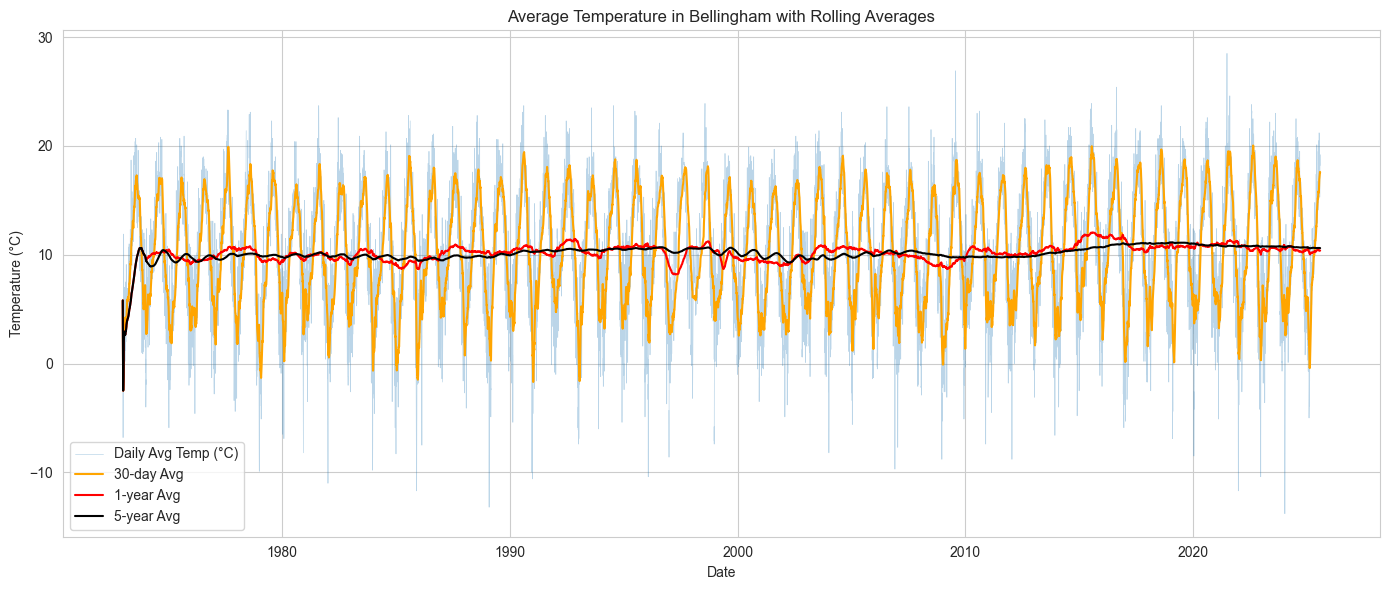

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(df['time'], df['temp_avg_c'], label='Daily Avg Temp (°C)', alpha=0.3, linewidth=0.5)
plt.plot(df['time'], df['avg_30d'], label='30-day Avg', color='orange')
plt.plot(df['time'], df['avg_1y'], label='1-year Avg', color='red')
plt.plot(df['time'], df['avg_5y'], label='5-year Avg', color='black')

plt.title("Average Temperature in Bellingham with Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

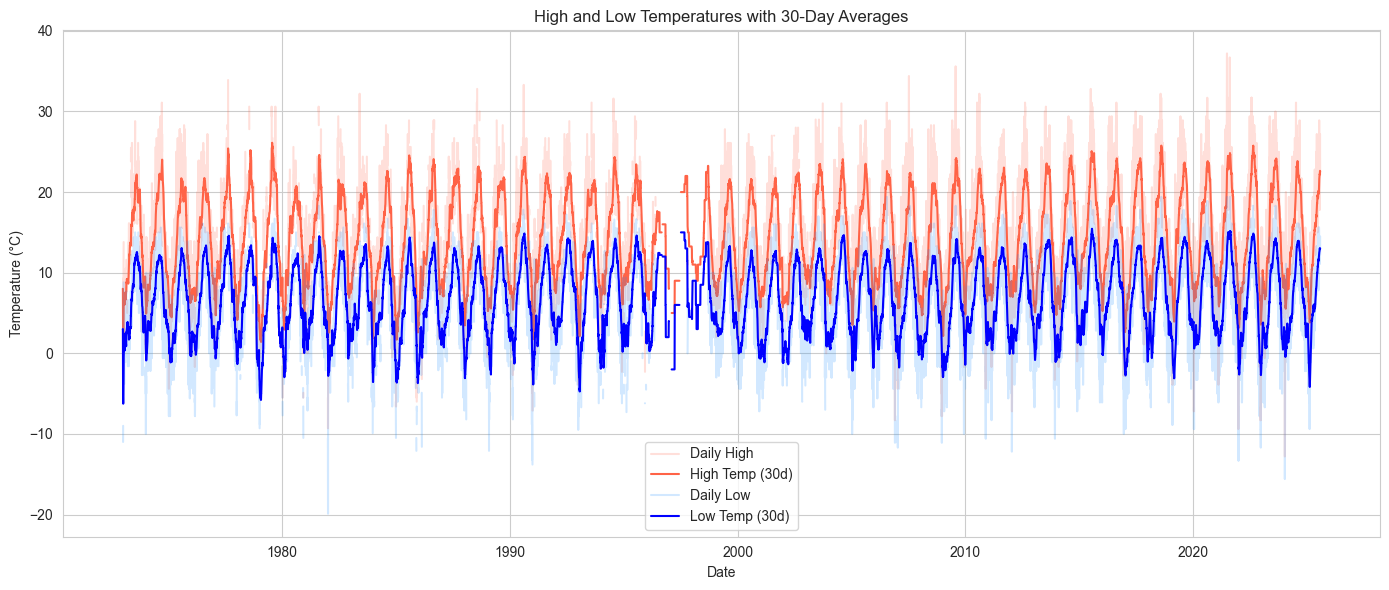

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['temp_high_c'], label='Daily High', alpha=0.2, color='tomato')
plt.plot(df['time'], df['high_30d'], label='High Temp (30d)', color='tomato')

plt.plot(df['time'], df['temp_low_c'], label='Daily Low', alpha=0.2, color='dodgerblue')
plt.plot(df['time'], df['low_30d'], label='Low Temp (30d)', color='blue')

plt.title("High and Low Temperatures with 30-Day Averages")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

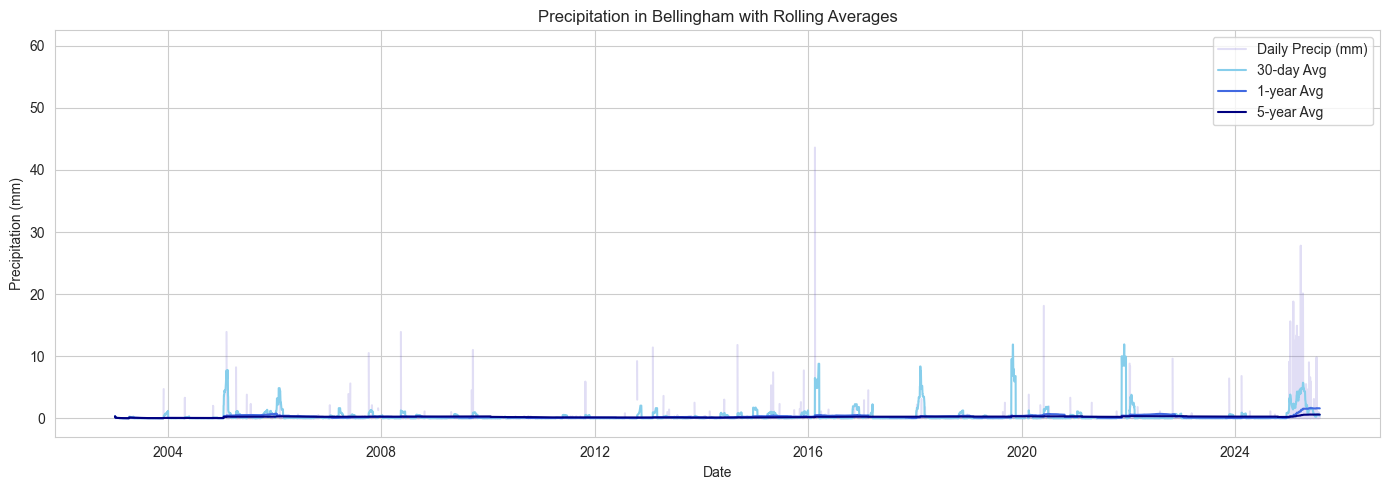

In [13]:
plt.figure(figsize=(14, 5))
plt.plot(df['time'], df['precip_mm'], label='Daily Precip (mm)', alpha=0.2, color='slateblue')
plt.plot(df['time'], df['precip_30d'], label='30-day Avg', color='skyblue')
plt.plot(df['time'], df['precip_1y'], label='1-year Avg', color='royalblue')
plt.plot(df['time'], df['precip_5y'], label='5-year Avg', color='navy')

plt.title("Precipitation in Bellingham with Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

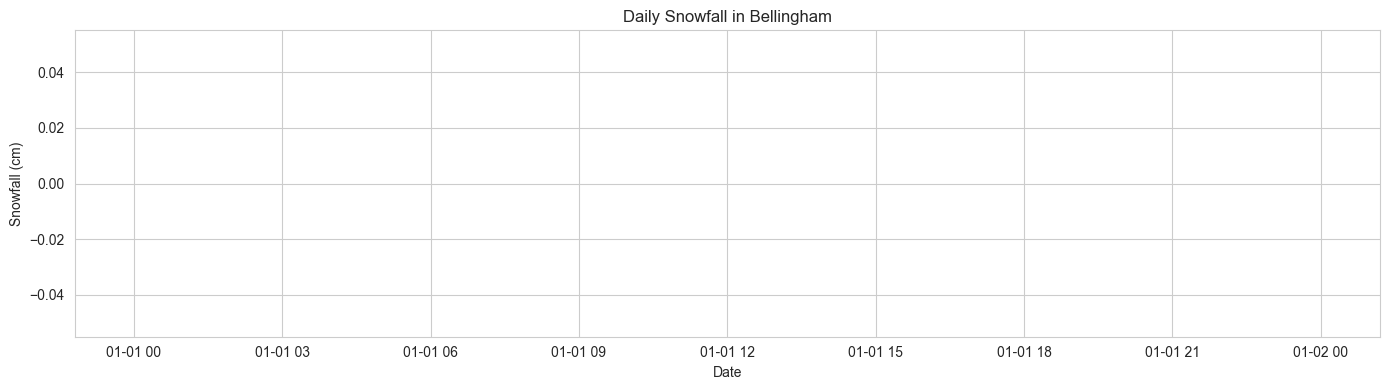

In [14]:
plt.figure(figsize=(14, 4))
plt.plot(df['time'], df['snow_cm'], color='purple', alpha=0.7)
plt.title("Daily Snowfall in Bellingham")
plt.xlabel("Date")
plt.ylabel("Snowfall (cm)")
plt.grid(True)
plt.tight_layout()
plt.show()

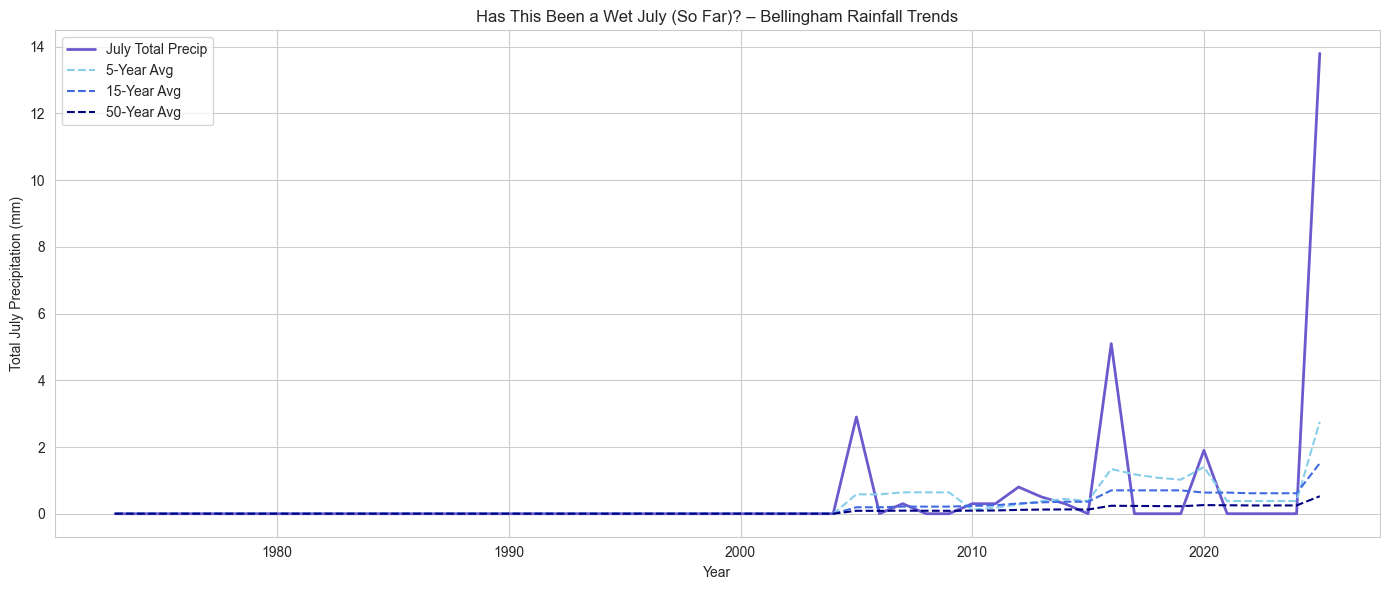

In [15]:
from datetime import datetime
# Ensure datetime columns exist
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

# Focus on July data
july_df = df[df['month'] == 7].copy()

# Limit to July 1 through today’s date (e.g., July 18)
today_day = datetime.now().day
july_df = july_df[july_df['time'].dt.day <= today_day]

# Group by year and sum July rainfall (to current day-of-month)
july_rainfall = july_df.groupby('year')['precip_mm'].sum().reset_index()
july_rainfall.columns = ['year', 'july_precip_mm']

# Rolling averages over 5, 15, 50 years
july_rainfall['roll_5'] = july_rainfall['july_precip_mm'].rolling(5, min_periods=1).mean()
july_rainfall['roll_15'] = july_rainfall['july_precip_mm'].rolling(15, min_periods=1).mean()
july_rainfall['roll_50'] = july_rainfall['july_precip_mm'].rolling(50, min_periods=1).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(july_rainfall['year'], july_rainfall['july_precip_mm'], label='July Total Precip', color='slateblue', linewidth=2)
plt.plot(july_rainfall['year'], july_rainfall['roll_5'], label='5-Year Avg', linestyle='--', color='skyblue')
plt.plot(july_rainfall['year'], july_rainfall['roll_15'], label='15-Year Avg', linestyle='--', color='royalblue')
plt.plot(july_rainfall['year'], july_rainfall['roll_50'], label='50-Year Avg', linestyle='--', color='navy')

plt.title("Has This Been a Wet July (So Far)? – Bellingham Rainfall Trends")
plt.xlabel("Year")
plt.ylabel("Total July Precipitation (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

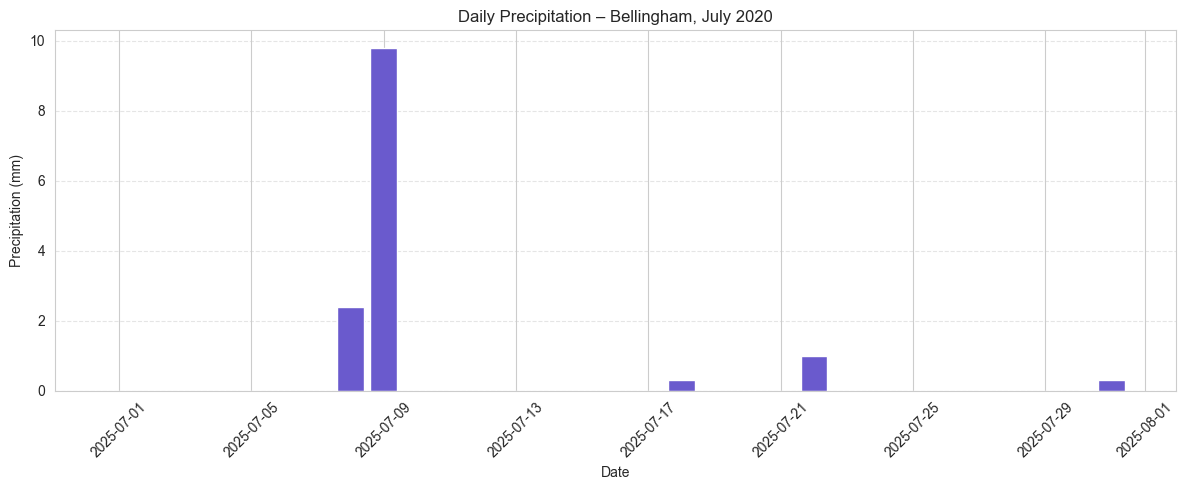

In [16]:
# Filter for July 2020
july_2020 = df[(df['time'] >= '2025-07-01') & (df['time'] <= '2025-07-31')].copy()

# Plot
plt.figure(figsize=(12, 5))
plt.bar(july_2020['time'], july_2020['precip_mm'], color='slateblue')
plt.title("Daily Precipitation – Bellingham, July 2020")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

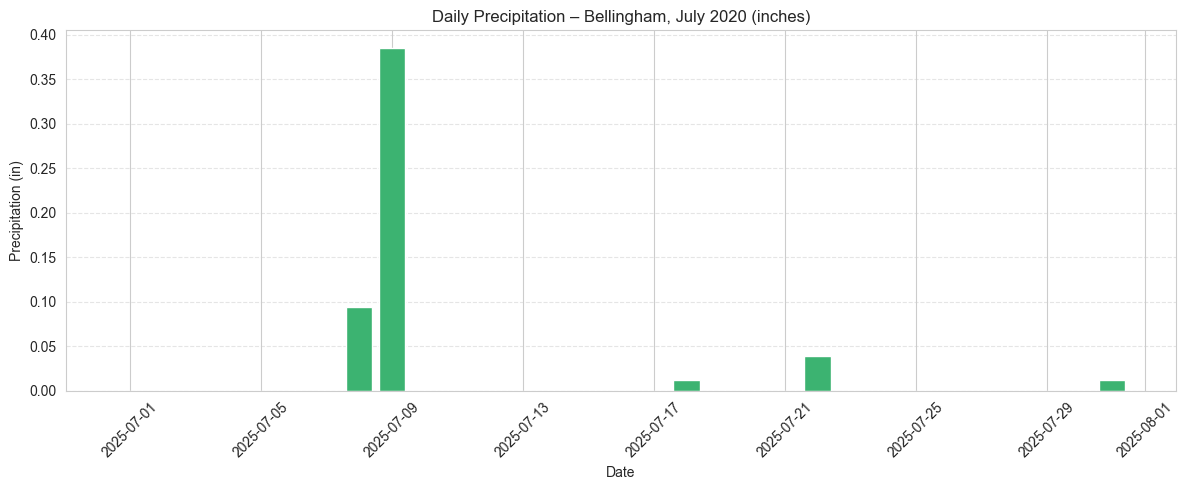

In [17]:
# Add precip_inches column
july_2020['precip_in'] = july_2020['precip_mm'] / 25.4  # 1 inch = 25.4 mm

plt.figure(figsize=(12, 5))
plt.bar(july_2020['time'], july_2020['precip_in'], color='mediumseagreen')
plt.title("Daily Precipitation – Bellingham, July 2020 (inches)")
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Temperature
See how many missing days per year for Temperature


In [18]:
import pandas as pd

# Ensure 'time' is datetime
df['time'] = pd.to_datetime(df['time'])

# Define temperature columns of interest
temp_cols = ['temp_low_c', 'temp_high_c', 'temp_avg_c']

# Create a column that flags full missing temp records
df['missing_temp'] = df[temp_cols].isnull().all(axis=1)

# Extract year
df['year'] = df['time'].dt.year

# Group by year and count missing days
missing_by_year = df[df['missing_temp']].groupby('year').size().reset_index(name='missing_days')

# Show all years with at least one missing day
print(missing_by_year)

    year  missing_days
0   1977             5
1   1978             4
2   1979             3
3   1981             1
4   1982             1
5   1985             1
6   1986             2
7   1987             1
8   1988             1
9   1989             1
10  1992             1
11  1995             1
12  1996             8
13  1997             7
14  1998             4
15  1999             4
16  2002             1
17  2003            15
18  2004             3
19  2009             1
20  2011             2
21  2018             1


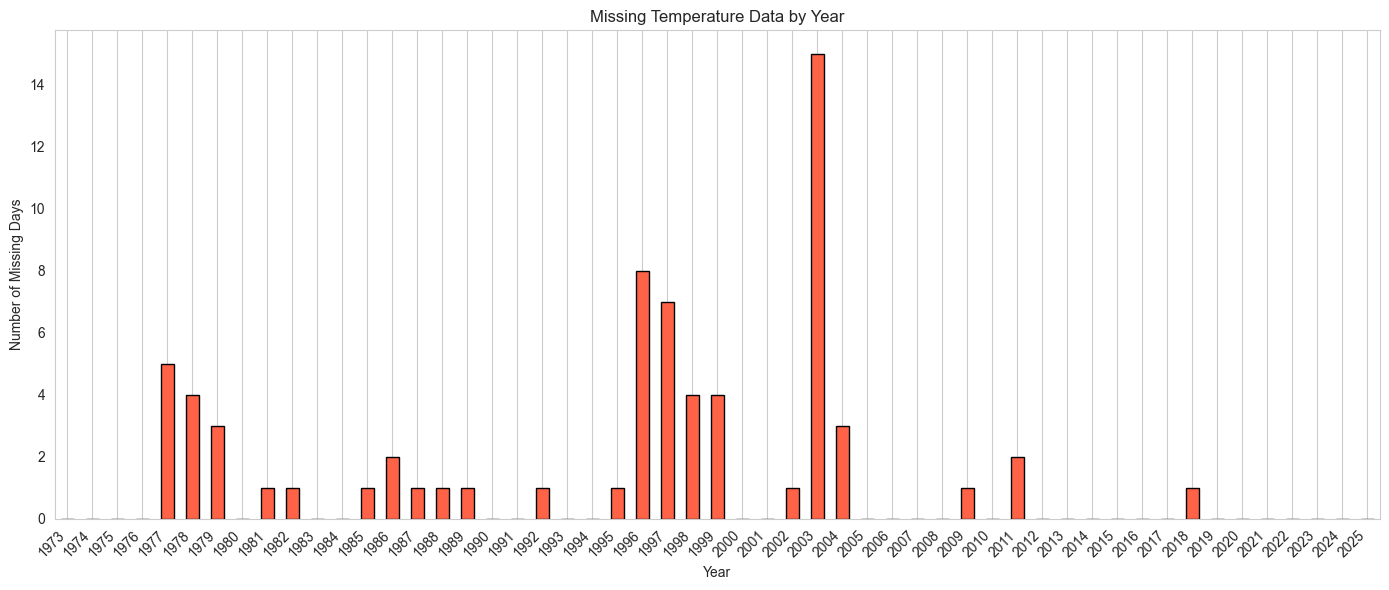

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'time' column is datetime and sorted
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

# Extract year and define missing temperature rows
df['year'] = df['time'].dt.year
key_cols = ['temp_avg_c', 'temp_high_c', 'temp_low_c']
df['missing_temp'] = df[key_cols].isnull().all(axis=1)

# Count missing temperature days per year
missing_by_year = df[df['missing_temp']].groupby('year').size()

# Reindex to include all years in the dataset
all_years = pd.Series(index=range(df['year'].min(), df['year'].max() + 1), dtype=int)
missing_by_year = all_years.add(missing_by_year, fill_value=0)

# Plot
plt.figure(figsize=(14, 6))
missing_by_year.plot(kind='bar', color='tomato', edgecolor='black')
plt.title('Missing Temperature Data by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Days')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

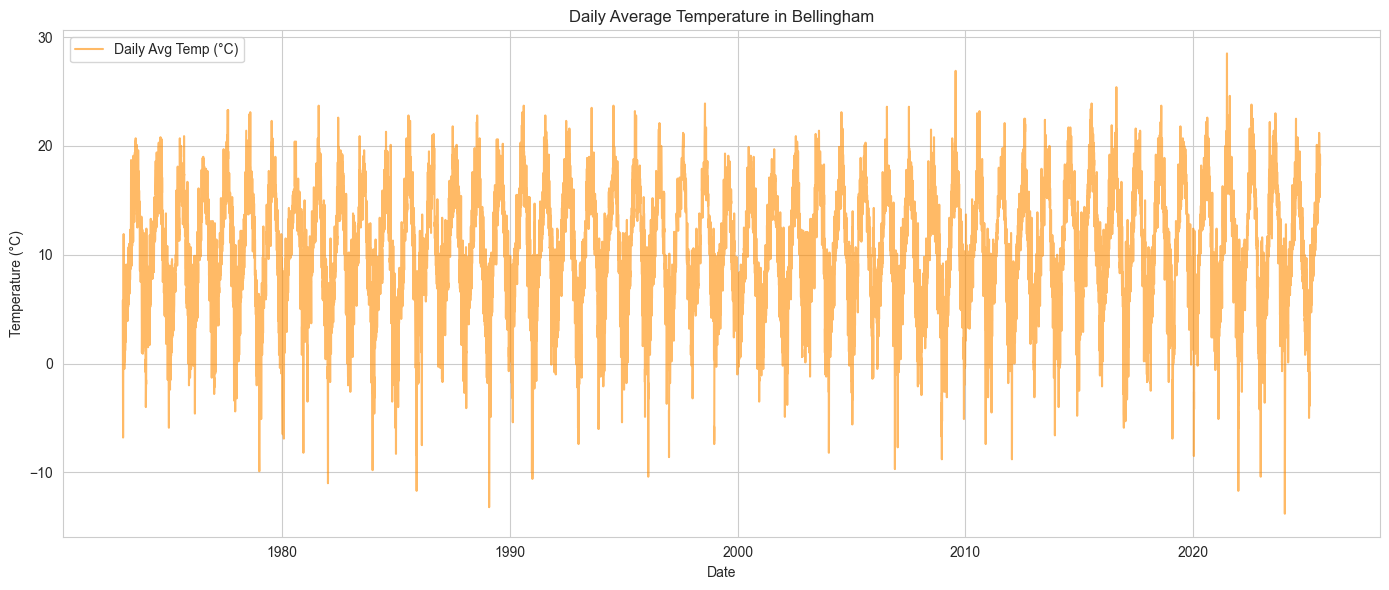

In [20]:
import matplotlib.pyplot as plt

# Make sure data is sorted by date
df = df.sort_values('time')

# Plot daily average temperature
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['temp_avg_c'], color='darkorange', alpha=0.6, label='Daily Avg Temp (°C)')

plt.title('Daily Average Temperature in Bellingham')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

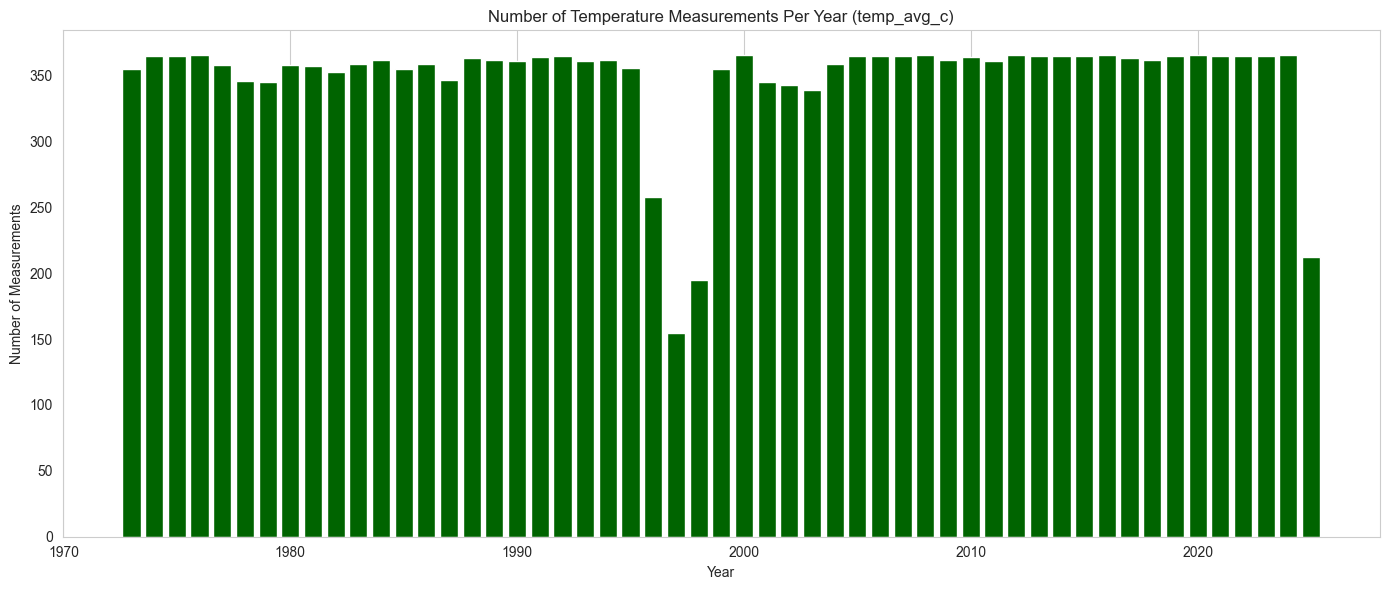

In [21]:
# Ensure datetime is parsed and year is extracted
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year

# Count number of valid temp_avg_c values per year
yearly_counts = df.groupby('year')['temp_avg_c'].count()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.bar(yearly_counts.index, yearly_counts.values, color='darkgreen')
plt.title("Number of Temperature Measurements Per Year (temp_avg_c)")
plt.xlabel("Year")
plt.ylabel("Number of Measurements")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

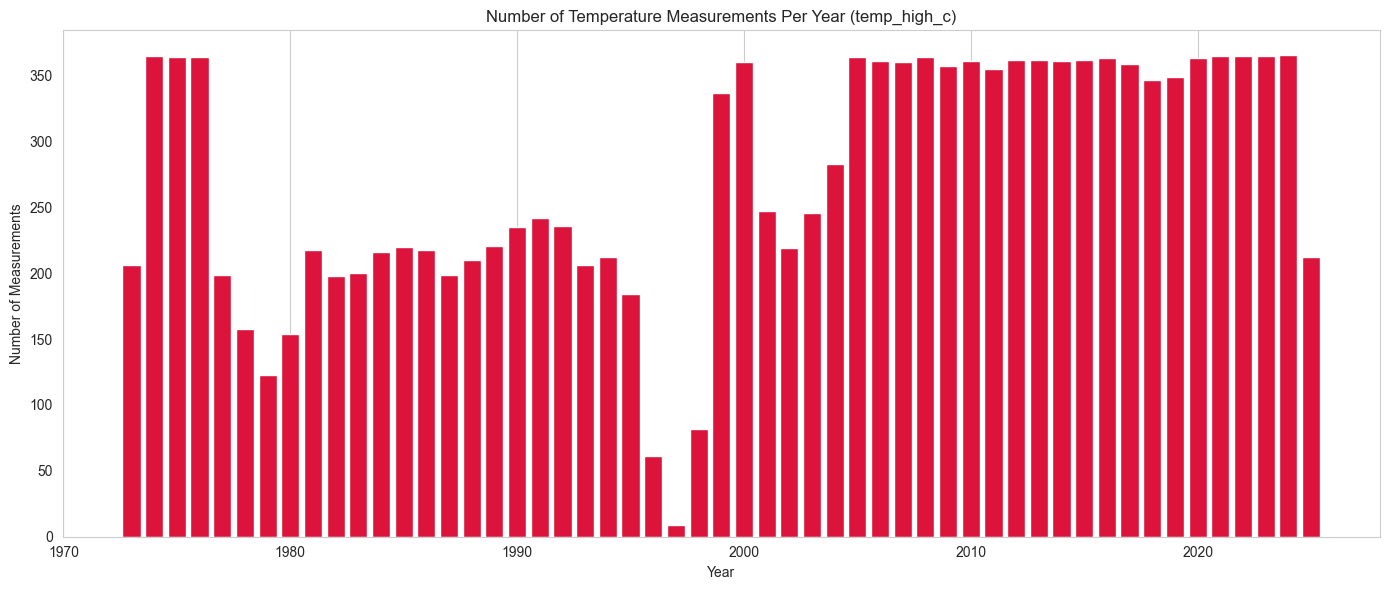

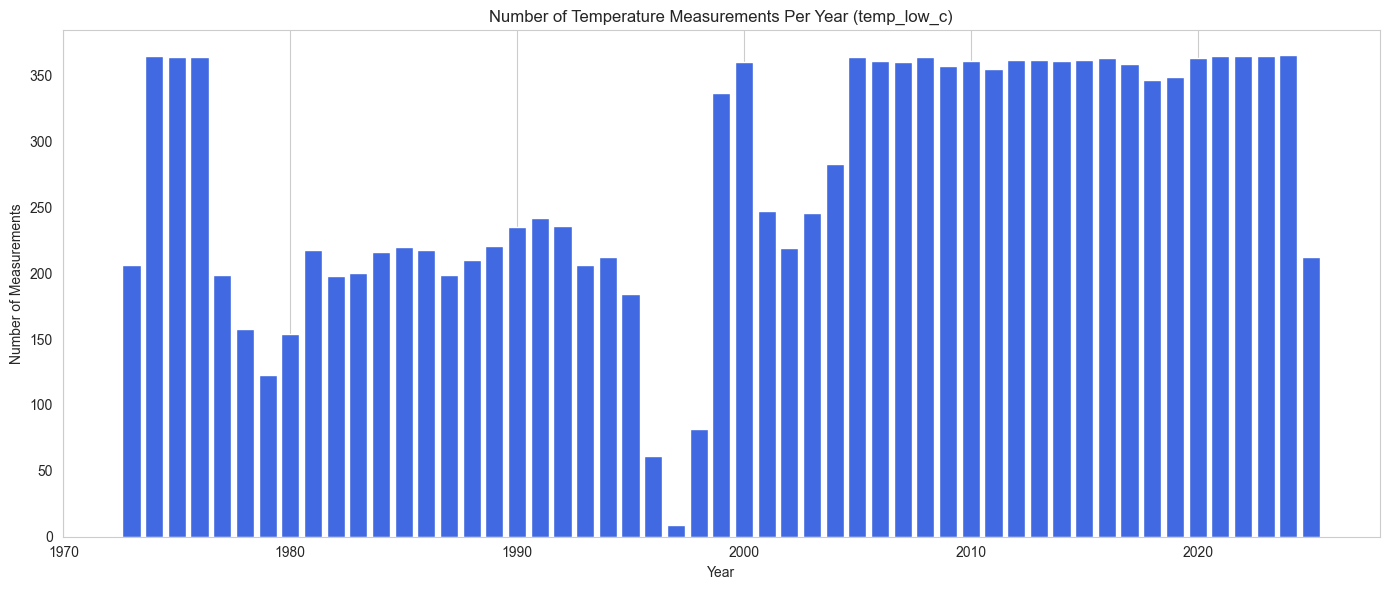

In [22]:
# Count number of valid temp_high_c values per year
yearly_high_counts = df.groupby('year')['temp_high_c'].count()

# Count number of valid temp_low_c values per year
yearly_low_counts = df.groupby('year')['temp_low_c'].count()

import matplotlib.pyplot as plt

# Plot for temp_high_c
plt.figure(figsize=(14, 6))
plt.bar(yearly_high_counts.index, yearly_high_counts.values, color='crimson')
plt.title("Number of Temperature Measurements Per Year (temp_high_c)")
plt.xlabel("Year")
plt.ylabel("Number of Measurements")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot for temp_low_c
plt.figure(figsize=(14, 6))
plt.bar(yearly_low_counts.index, yearly_low_counts.values, color='royalblue')
plt.title("Number of Temperature Measurements Per Year (temp_low_c)")
plt.xlabel("Year")
plt.ylabel("Number of Measurements")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

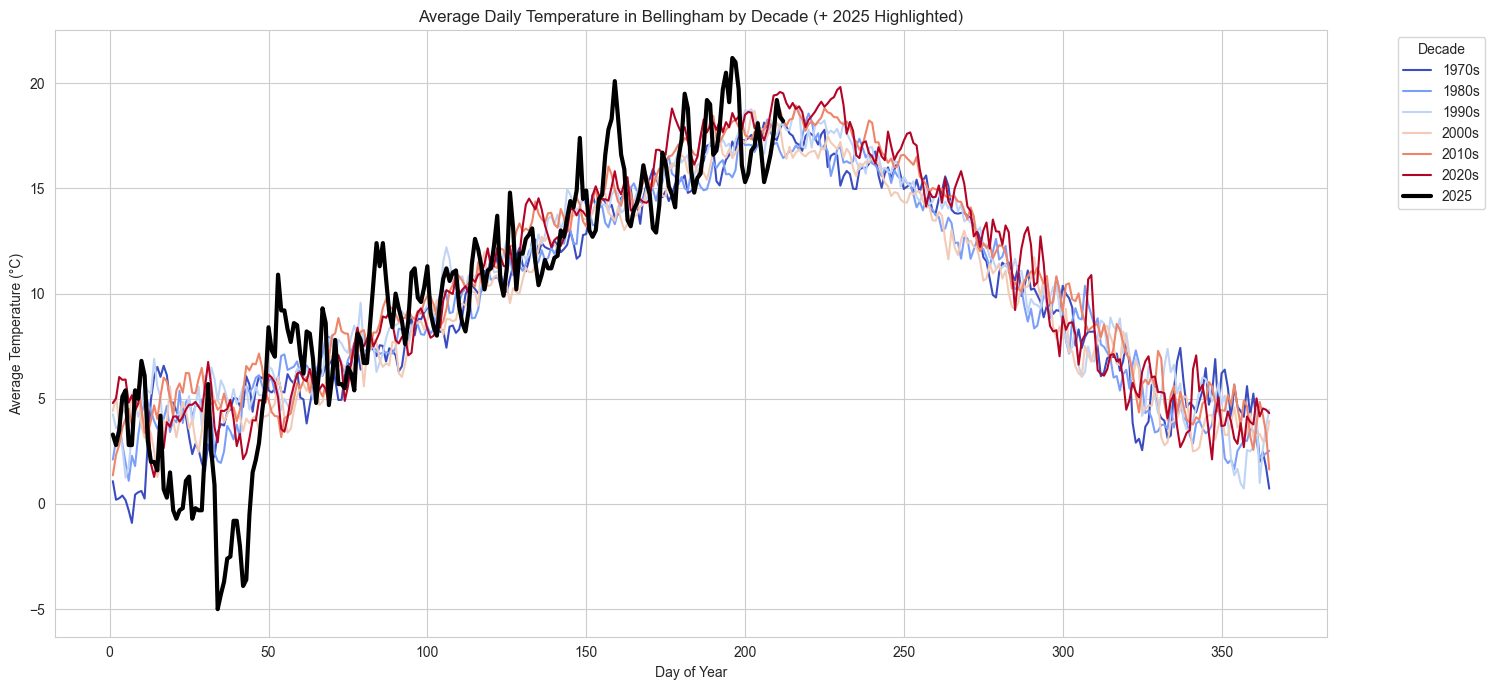

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure datetime and create needed columns
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]  # Remove leap day

# Create decade field
df['decade'] = (df['year'] // 10) * 10

# Group by decade and day-of-year (mean temp)
decade_doy_avg = df.groupby(['decade', 'doy'])['temp_avg_c'].mean().reset_index()
pivot_df = decade_doy_avg.pivot(index='doy', columns='decade', values='temp_avg_c')

# Extract 2025 data
df_2025 = df[df['year'] == 2025].groupby('doy')['temp_avg_c'].mean()

# Gradient colormap setup
decades = pivot_df.columns.sort_values()
cmap = plt.cm.coolwarm
norm = plt.Normalize(decades.min(), decades.max())
colors = [cmap(norm(d)) for d in decades]

# Plot
plt.figure(figsize=(15, 7))

# Plot each decade
for color, decade in zip(colors, decades):
    plt.plot(pivot_df.index, pivot_df[decade], label=f"{decade}s", color=color, linewidth=1.5)

# Plot 2025 with thicker black line
plt.plot(df_2025.index, df_2025.values, label="2025", color='black', linewidth=3, linestyle='-')

plt.title("Average Daily Temperature in Bellingham by Decade (+ 2025 Highlighted)")
plt.xlabel("Day of Year")
plt.ylabel("Average Temperature (°C)")
plt.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

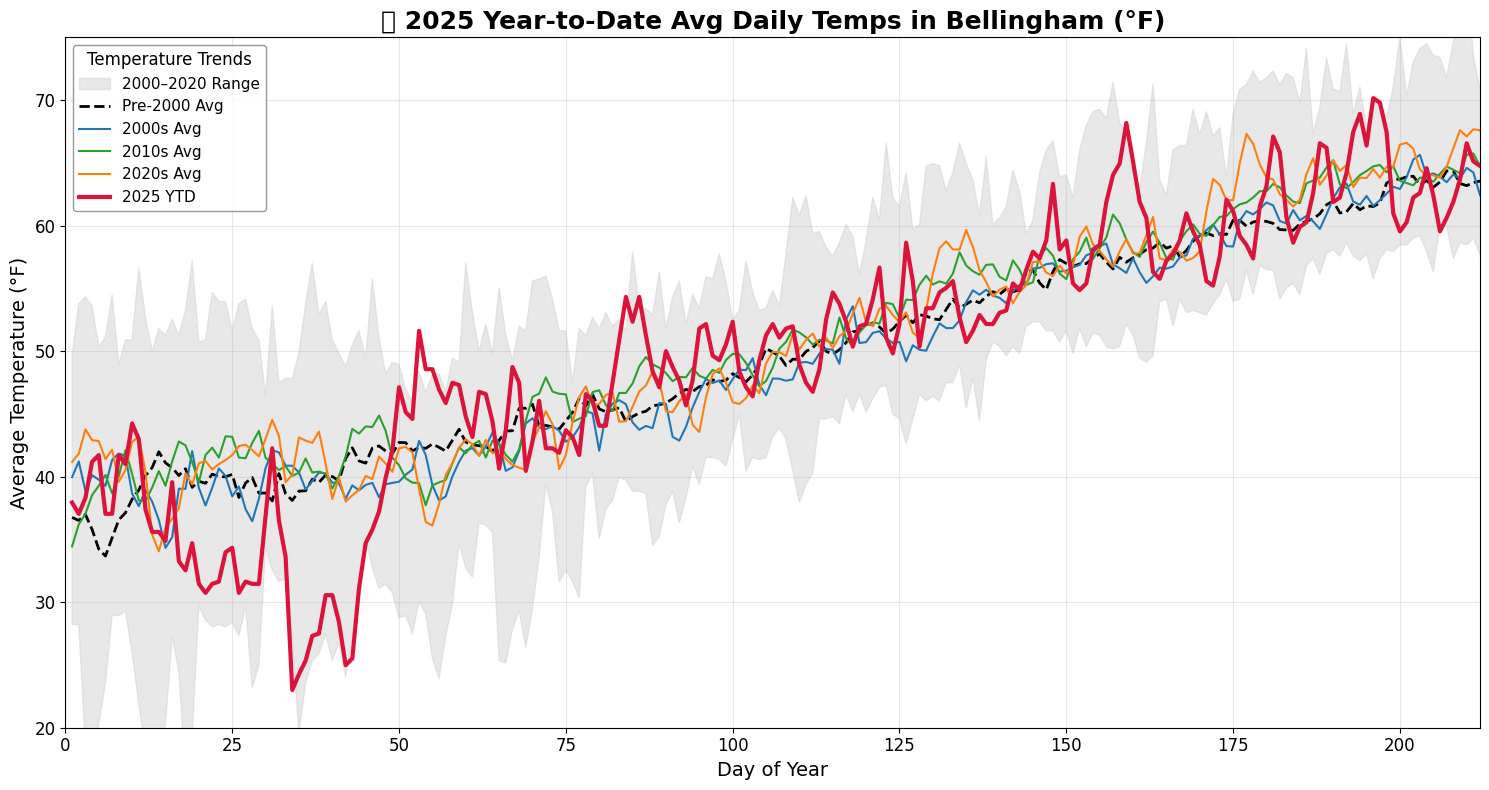

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure datetime and create necessary columns
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]

# Convert to Fahrenheit
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32

# Grouping
df_2025 = df[df['year'] == 2025].groupby('doy')['temp_avg_f'].mean()
df_2020s = df[df['year'].between(2020, 2024)].groupby('doy')['temp_avg_f'].mean()
df_2010s = df[df['year'].between(2010, 2019)].groupby('doy')['temp_avg_f'].mean()
df_2000s = df[df['year'].between(2000, 2009)].groupby('doy')['temp_avg_f'].mean()
df_hist = df[df['year'] < 2000].groupby('doy')['temp_avg_f'].mean()

# Prepare range band for 2000–2020
range_data = df[df['year'].between(2000, 2020)].groupby(['year', 'doy'])['temp_avg_f'].mean().reset_index()
pivot = range_data.pivot(index='doy', columns='year', values='temp_avg_f')
band_min = pivot.min(axis=1).astype(float)
band_max = pivot.max(axis=1).astype(float)
doy = pivot.index.astype(int)

# Drop any rows with NaNs
mask = band_min.notna() & band_max.notna()

# Plotting
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 8))

# Fill between for range
ax.fill_between(doy[mask], band_min[mask], band_max[mask], color='lightgrey', alpha=0.5, label='2000–2020 Range')

# Line plots
ax.plot(df_hist.index, df_hist.values, '--', color='black', linewidth=2, label="Pre-2000 Avg")
ax.plot(df_2000s.index, df_2000s.values, color='#1f77b4', linewidth=1.5, label="2000s Avg")
ax.plot(df_2010s.index, df_2010s.values, color='#2ca02c', linewidth=1.5, label="2010s Avg")
ax.plot(df_2020s.index, df_2020s.values, color='#ff7f0e', linewidth=1.5, label="2020s Avg")
ax.plot(df_2025.index, df_2025.values, color='crimson', linewidth=3, label="2025 YTD")

# Titles and labels
ax.set_title("📈 2025 Year-to-Date Avg Daily Temps in Bellingham (°F)", fontsize=18, weight='bold')
ax.set_xlabel("Day of Year", fontsize=14)
ax.set_ylabel("Average Temperature (°F)", fontsize=14)

# Legend
legend = ax.legend(title="Temperature Trends", fontsize=11, title_fontsize=12, loc='upper left')
legend.get_frame().set_edgecolor('gray')

# Formatting
ax.grid(alpha=0.3)
ax.set_xlim(0, df_2025.index.max())
ax.set_ylim(20, 75)
ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

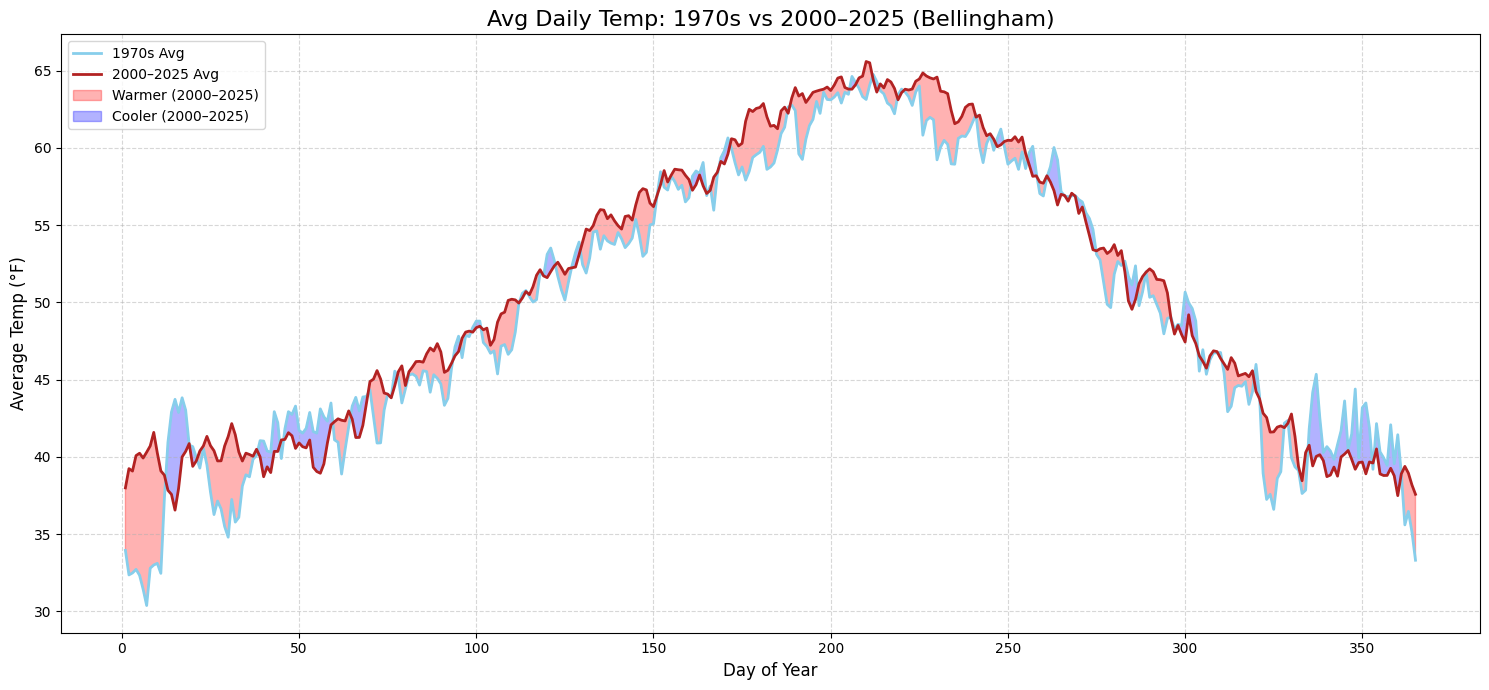

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and create helper columns
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]  # Remove leap day

# Convert to Fahrenheit
df['temp_avg_f'] = df['temp_avg_c'] * 9/5 + 32

# Filter by decade ranges
df_1970s = df[(df['year'] >= 1970) & (df['year'] <= 1979)]
df_2000_2025 = df[(df['year'] >= 2000) & (df['year'] <= 2025)]

# Average by day of year
avg_1970s = df_1970s.groupby('doy')['temp_avg_f'].mean()
avg_2000_2025 = df_2000_2025.groupby('doy')['temp_avg_f'].mean()

# Plotting
plt.figure(figsize=(15, 7))

# Plot lines
plt.plot(avg_1970s.index, avg_1970s.values, label='1970s Avg', color='skyblue', linewidth=2)
plt.plot(avg_2000_2025.index, avg_2000_2025.values, label='2000–2025 Avg', color='firebrick', linewidth=2)

# Fill where 2000–2025 > 1970s
plt.fill_between(avg_1970s.index, avg_2000_2025, avg_1970s,
                 where=(avg_2000_2025 > avg_1970s),
                 interpolate=True, color='red', alpha=0.3, label='Warmer (2000–2025)')

# Fill where 2000–2025 < 1970s
plt.fill_between(avg_1970s.index, avg_2000_2025, avg_1970s,
                 where=(avg_2000_2025 < avg_1970s),
                 interpolate=True, color='blue', alpha=0.3, label='Cooler (2000–2025)')

# Final styling
plt.title("Avg Daily Temp: 1970s vs 2000–2025 (Bellingham)", fontsize=16)
plt.xlabel("Day of Year", fontsize=12)
plt.ylabel("Average Temp (°F)", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [26]:
# 1. Difference Series
temp_diff = avg_2000_2025 - avg_1970s

# 2. Warmer / Colder Days
num_warmer_days = (temp_diff > 0).sum()
num_cooler_days = (temp_diff < 0).sum()
num_equal_days = (temp_diff == 0).sum()

# 3. Mean temps
mean_1970s = avg_1970s.mean()
mean_2000s = avg_2000_2025.mean()
mean_delta = mean_2000s - mean_1970s
percent_change = (mean_delta / mean_1970s) * 100

# 4. Max & Min daily difference
max_daily_increase = temp_diff.max()
max_daily_decrease = temp_diff.min()

# 5. Days with >2°F difference
large_increase_days = (temp_diff > 2).sum()
large_decrease_days = (temp_diff < -2).sum()

# 6. Standard deviation of daily differences
std_dev_diff = temp_diff.std()

# Display results
print(f"📅 Year-to-date through Day {temp_diff.index.max()} (July 18):")
print(f"📆 Total days included: {len(temp_diff)}")
print(f"🌡️  Days warmer than 1970s: {num_warmer_days}")
print(f"❄️  Days cooler than 1970s: {num_cooler_days}")
print(f"🔹 Days with no change:     {num_equal_days}")
print(f"📈 Avg temp (1970s):       {mean_1970s:.2f} °F")
print(f"📈 Avg temp (2000–2025):   {mean_2000s:.2f} °F")
print(f"⬆️ Change in avg:          {mean_delta:.2f} °F ({percent_change:.2f}%)")
print(f"🔥 Max daily increase:     {max_daily_increase:.2f} °F")
print(f"🧊 Max daily decrease:     {max_daily_decrease:.2f} °F")
print(f"🔺 Days > 2°F warmer:      {large_increase_days}")
print(f"🔻 Days > 2°F cooler:      {large_decrease_days}")
print(f"📊 Std Dev of differences: {std_dev_diff:.2f} °F")

📅 Year-to-date through Day 365 (July 18):
📆 Total days included: 365
🌡️  Days warmer than 1970s: 238
❄️  Days cooler than 1970s: 127
🔹 Days with no change:     0
📈 Avg temp (1970s):       49.85 °F
📈 Avg temp (2000–2025):   50.66 °F
⬆️ Change in avg:          0.80 °F (1.61%)
🔥 Max daily increase:     9.93 °F
🧊 Max daily decrease:     -7.17 °F
🔺 Days > 2°F warmer:      86
🔻 Days > 2°F cooler:      29
📊 Std Dev of differences: 2.31 °F


In [27]:
import pandas as pd

# Make sure your DataFrame 'df' is preprocessed
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]  # Remove leap day
df['temp_avg_f'] = df['temp_avg_c'] * 9/5 + 32

# Filter for comparison periods
df_2015_2023 = df[(df['year'] >= 2015) & (df['year'] <= 2023)]
df_2024_2025 = df[(df['year'] >= 2024) & (df['year'] <= 2025)]

# Group by DOY and compute average temperature for each group
avg_2015_2023 = df_2015_2023.groupby('doy')['temp_avg_f'].mean()
avg_2024_2025 = df_2024_2025.groupby('doy')['temp_avg_f'].mean()

# Align indexes and compute difference
temp_diff = avg_2024_2025 - avg_2015_2023
temp_diff = temp_diff.dropna()

# Statistics
num_warmer_days = (temp_diff > 0).sum()
num_cooler_days = (temp_diff < 0).sum()
num_equal_days = (temp_diff == 0).sum()

mean_2015_2023 = avg_2015_2023.mean()
mean_2024_2025 = avg_2024_2025.mean()
mean_delta = mean_2024_2025 - mean_2015_2023
percent_change = (mean_delta / mean_2015_2023) * 100

max_daily_increase = temp_diff.max()
max_daily_decrease = temp_diff.min()

large_increase_days = (temp_diff > 2).sum()
large_decrease_days = (temp_diff < -2).sum()

std_dev_diff = temp_diff.std()

# Output
print(f"📅 Year-to-date through Day {temp_diff.index.max()} (e.g., July 18):")
print(f"📆 Total days compared: {len(temp_diff)}")
print(f"🌡️  Days warmer than 2015–2023: {num_warmer_days}")
print(f"❄️  Days cooler than 2015–2023: {num_cooler_days}")
print(f"➖ Days with no change:          {num_equal_days}")
print(f"📈 Avg temp (2015–2023):        {mean_2015_2023:.2f} °F")
print(f"📈 Avg temp (2024–2025):        {mean_2024_2025:.2f} °F")
print(f"⬆️ Change in avg:               {mean_delta:.2f} °F ({percent_change:.2f}%)")
print(f"🔥 Max daily increase:          {max_daily_increase:.2f} °F")
print(f"🧊 Max daily decrease:          {max_daily_decrease:.2f} °F")
print(f"🔺 Days > 2°F warmer:           {large_increase_days}")
print(f"🔻 Days > 2°F cooler:           {large_decrease_days}")
print(f"📊 Std Dev of differences:      {std_dev_diff:.2f} °F")

📅 Year-to-date through Day 365 (e.g., July 18):
📆 Total days compared: 365
🌡️  Days warmer than 2015–2023: 139
❄️  Days cooler than 2015–2023: 225
➖ Days with no change:          1
📈 Avg temp (2015–2023):        51.63 °F
📈 Avg temp (2024–2025):        50.77 °F
⬆️ Change in avg:               -0.86 °F (-1.67%)
🔥 Max daily increase:          14.30 °F
🧊 Max daily decrease:          -19.50 °F
🔺 Days > 2°F warmer:           83
🔻 Days > 2°F cooler:           146
📊 Std Dev of differences:      4.32 °F


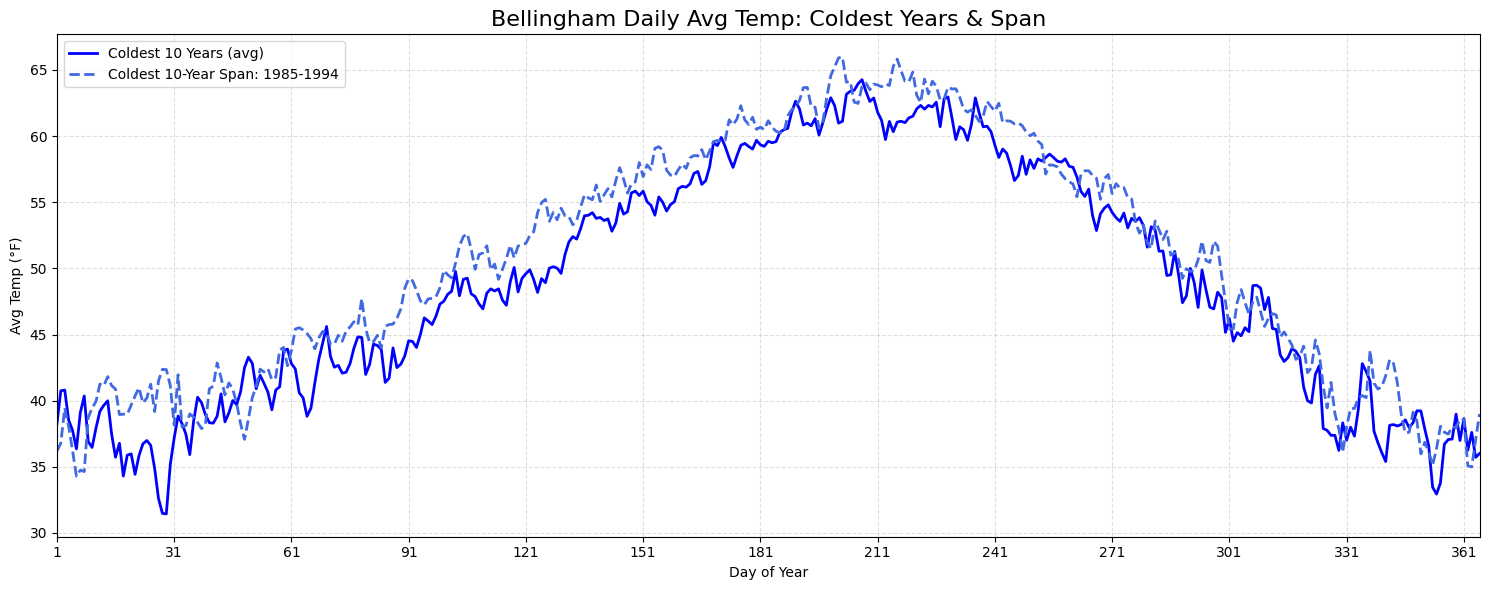

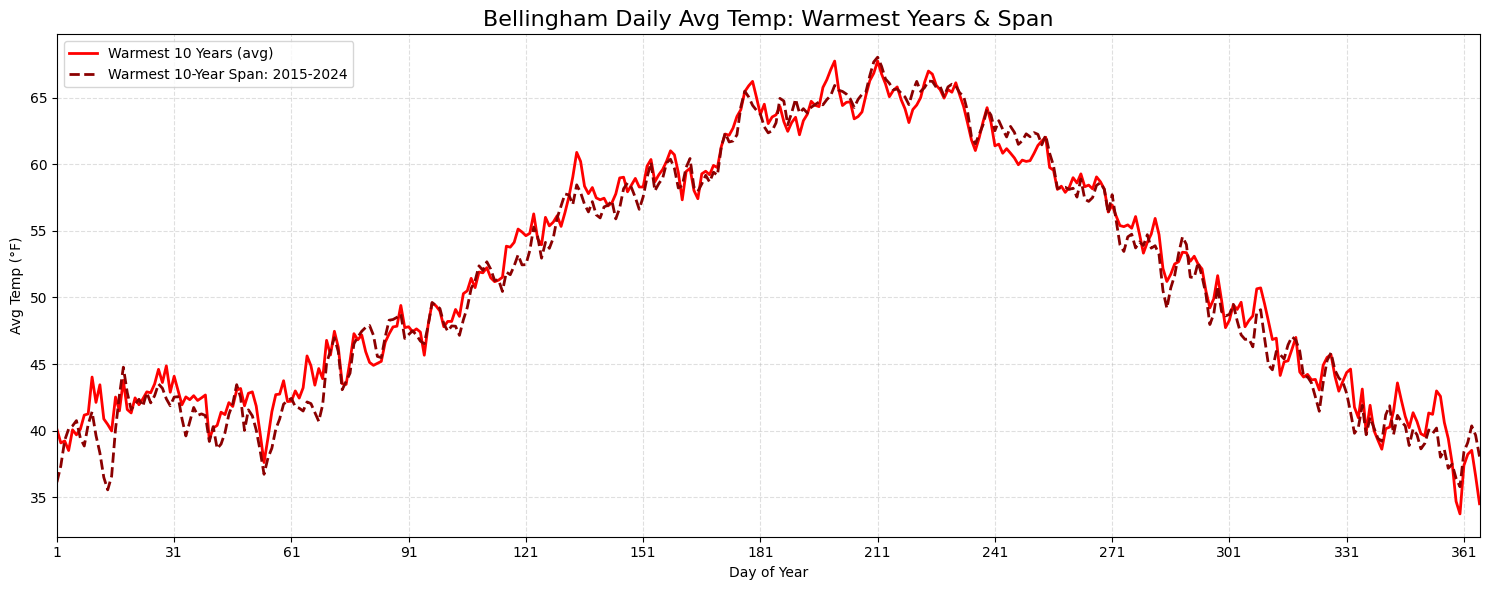

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and create helper columns
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]  # Remove leap day
df['temp_avg_f'] = df['temp_avg_c'] * 9/5 + 32

# 1. Identify 10 coldest and 10 warmest individual years
yearly_avg = df.groupby('year')['temp_avg_f'].mean()
coldest_years = yearly_avg.nsmallest(10).index
warmest_years = yearly_avg.nlargest(10).index

# 2. Compute average by day-of-year
avg_coldest_years = df[df['year'].isin(coldest_years)].groupby('doy')['temp_avg_f'].mean()
avg_warmest_years = df[df['year'].isin(warmest_years)].groupby('doy')['temp_avg_f'].mean()

# 3. Find coldest and warmest 10-year spans, capping warmest at 2024
rolling_10yr = yearly_avg[yearly_avg.index <= 2024].rolling(10).mean().dropna()
coldest_span_start = rolling_10yr.idxmin()
warmest_span_start = rolling_10yr.idxmax()

# Ensure span ends at or before 2024
if warmest_span_start + 9 > 2024:
    warmest_span_start = 2024 - 9

coldest_span_years = range(coldest_span_start, coldest_span_start + 10)
warmest_span_years = range(warmest_span_start, warmest_span_start + 10)

# 4. Compute average by day-of-year for spans
avg_coldest_span = df[df['year'].isin(coldest_span_years)].groupby('doy')['temp_avg_f'].mean()
avg_warmest_span = df[df['year'].isin(warmest_span_years)].groupby('doy')['temp_avg_f'].mean()

# ----------- Plot 1: Coldest Years and Span -----------
plt.figure(figsize=(15, 6))
plt.plot(avg_coldest_years.index, avg_coldest_years, label='Coldest 10 Years (avg)', color='blue', linewidth=2)
plt.plot(avg_coldest_span.index, avg_coldest_span, '--', color='royalblue', linewidth=2,
         label=f'Coldest 10-Year Span: {coldest_span_start}-{coldest_span_start+9}')
plt.title("Bellingham Daily Avg Temp: Coldest Years & Span", fontsize=16)
plt.xlabel("Day of Year")
plt.ylabel("Avg Temp (°F)")
plt.xlim(1, 365)
plt.xticks(ticks=range(1, 366, 30))
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ----------- Plot 2: Warmest Years and Span -----------
plt.figure(figsize=(15, 6))
plt.plot(avg_warmest_years.index, avg_warmest_years, label='Warmest 10 Years (avg)', color='red', linewidth=2)
plt.plot(avg_warmest_span.index, avg_warmest_span, '--', color='darkred', linewidth=2,
         label=f'Warmest 10-Year Span: {warmest_span_start}-{warmest_span_start+9}')
plt.title("Bellingham Daily Avg Temp: Warmest Years & Span", fontsize=16)
plt.xlabel("Day of Year")
plt.ylabel("Avg Temp (°F)")
plt.xlim(1, 365)
plt.xticks(ticks=range(1, 366, 30))
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

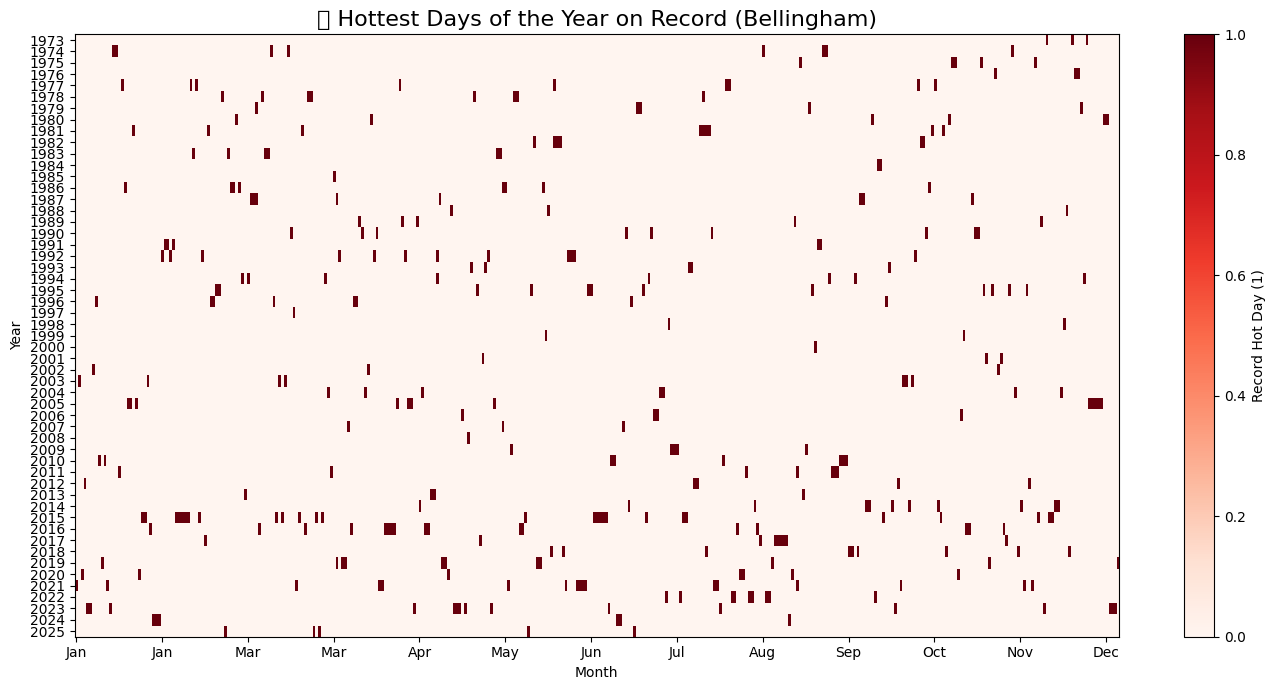

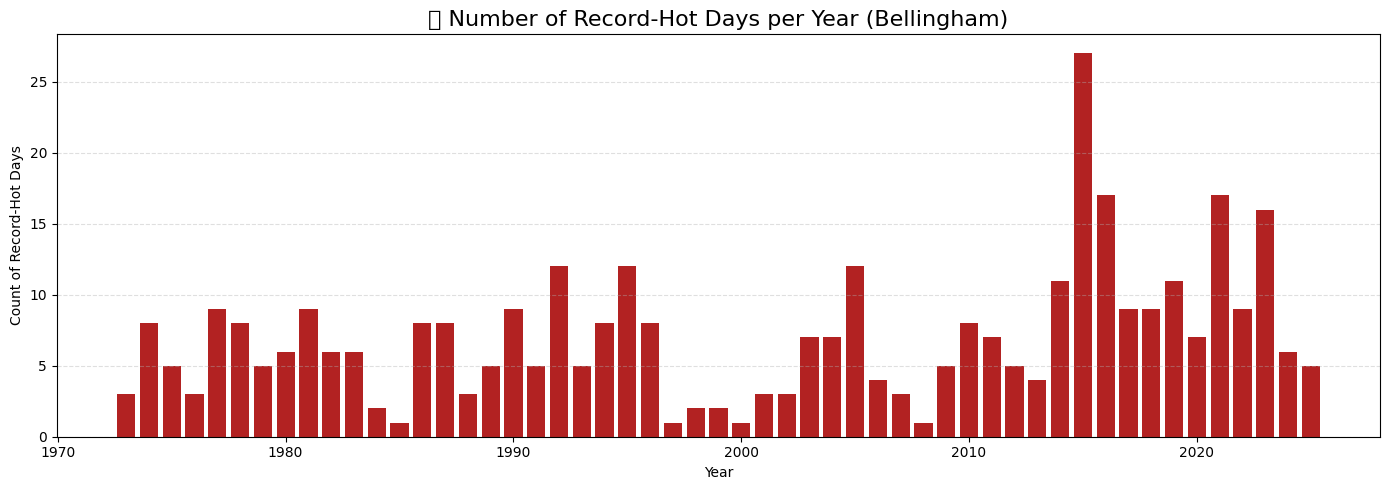

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np

# Ensure proper datetime and columns
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]  # Drop leap day
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32

# Get max temp per DOY (across all years)
historical_max = df.groupby('doy')['temp_avg_f'].max()

# Mark each row as a record-hot if it matches that day's max
df['record_hot'] = df.apply(lambda row: row['temp_avg_f'] == historical_max.get(row['doy']), axis=1)
df['record_hot'] = df['record_hot'].fillna(False)

# Filter for record-hot days only
hot_records = df[df['record_hot'] == True]

# Create matrix: years = rows, doy = cols, 1 if record-hot, else 0
calendar_matrix = pd.pivot_table(
    hot_records,
    index='year',
    columns='doy',
    values='record_hot',
    aggfunc='any',  # boolean: True if any record that day
    fill_value=False
).astype(int)

calendar_matrix = calendar_matrix.sort_index()

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(14, 7))
cax = ax.imshow(calendar_matrix.values, aspect='auto', cmap='Reds', interpolation='none')

# Y-axis: years
ax.set_yticks(np.arange(len(calendar_matrix.index)))
ax.set_yticklabels(calendar_matrix.index)

# X-axis: DOY → map to month labels
xticks = np.arange(0, 366, 30)
xtick_labels = [
    calendar.month_abbr[(pd.to_datetime('2024-01-01') + pd.Timedelta(days=d)).month]
    for d in xticks
]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)

# Title and labels
ax.set_title("🔥 Hottest Days of the Year on Record (Bellingham)", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Year")
plt.colorbar(cax, label="Record Hot Day (1)")

plt.tight_layout()
plt.show()

# --------- Histogram of Record-Hot Days by Year ---------
record_counts = calendar_matrix.sum(axis=1)

plt.figure(figsize=(14, 5))
plt.bar(record_counts.index, record_counts.values, color='firebrick')
plt.title("🔥 Number of Record-Hot Days per Year (Bellingham)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Count of Record-Hot Days")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

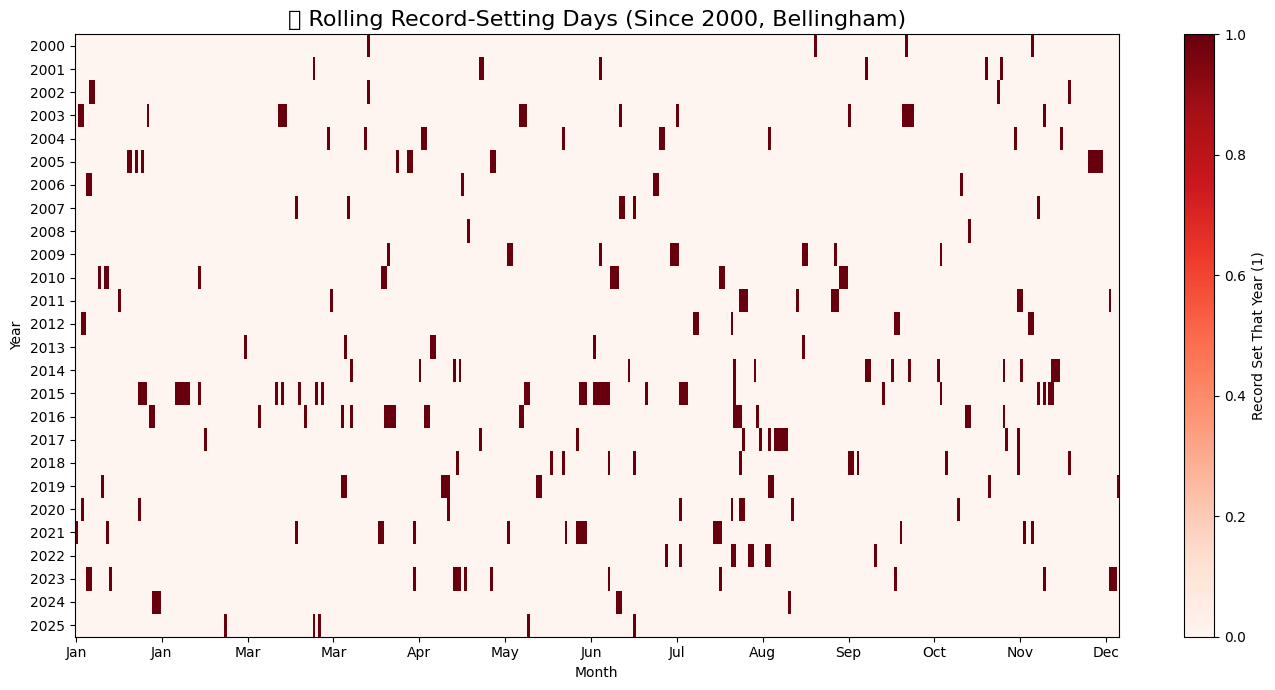

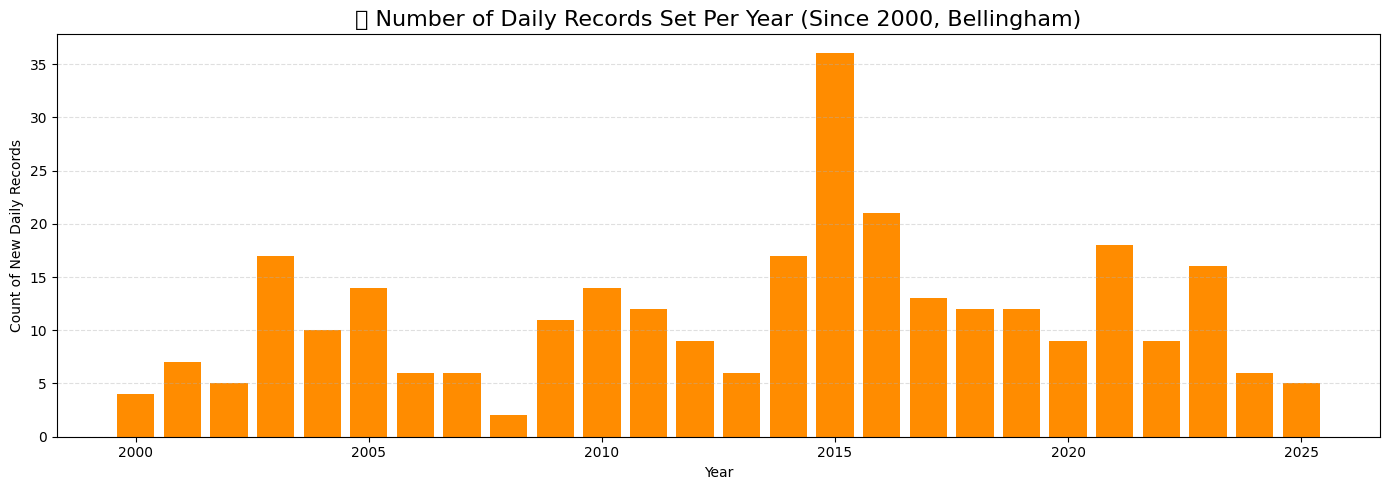

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Ensure proper datetime and columns
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]  # Drop leap day
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32

# Sort by time
df = df.sort_values('time')

# Prepare rolling record tracker
rolling_records = pd.DataFrame(False, index=sorted(df['year'].unique()), columns=range(1, 366))
historical_max = pd.Series(-np.inf, index=range(1, 366))

# Loop through years in order
for year in sorted(df['year'].unique()):
    year_data = df[df['year'] == year]
    for _, row in year_data.iterrows():
        doy = row['doy']
        temp = row['temp_avg_f']
        if pd.notna(temp) and pd.notna(doy) and temp > historical_max.get(doy, -np.inf):
            historical_max[doy] = temp
            rolling_records.at[year, doy] = True

# Filter for years >= 2000
rolling_records = rolling_records[rolling_records.index >= 2000]

# --------- Plot 1: Heatmap of Rolling Records (Since 2000) ---------
fig, ax = plt.subplots(figsize=(14, 7))
cax = ax.imshow(rolling_records.values.astype(int), aspect='auto', cmap='Reds', interpolation='none')

# Y-axis: years
ax.set_yticks(np.arange(len(rolling_records.index)))
ax.set_yticklabels(rolling_records.index)

# X-axis: DOY → Month labels
xticks = np.arange(0, 366, 30)
xtick_labels = [
    calendar.month_abbr[(pd.to_datetime('2024-01-01') + pd.Timedelta(days=d)).month]
    for d in xticks
]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)

ax.set_title("📈 Rolling Record-Setting Days (Since 2000, Bellingham)", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Year")
plt.colorbar(cax, label="Record Set That Year (1)")
plt.tight_layout()
plt.show()

# --------- Plot 2: Histogram of Record Counts by Year (Since 2000) ---------
record_counts = rolling_records.sum(axis=1)

plt.figure(figsize=(14, 5))
plt.bar(record_counts.index, record_counts.values, color='darkorange')
plt.title("📊 Number of Daily Records Set Per Year (Since 2000, Bellingham)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Count of New Daily Records")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

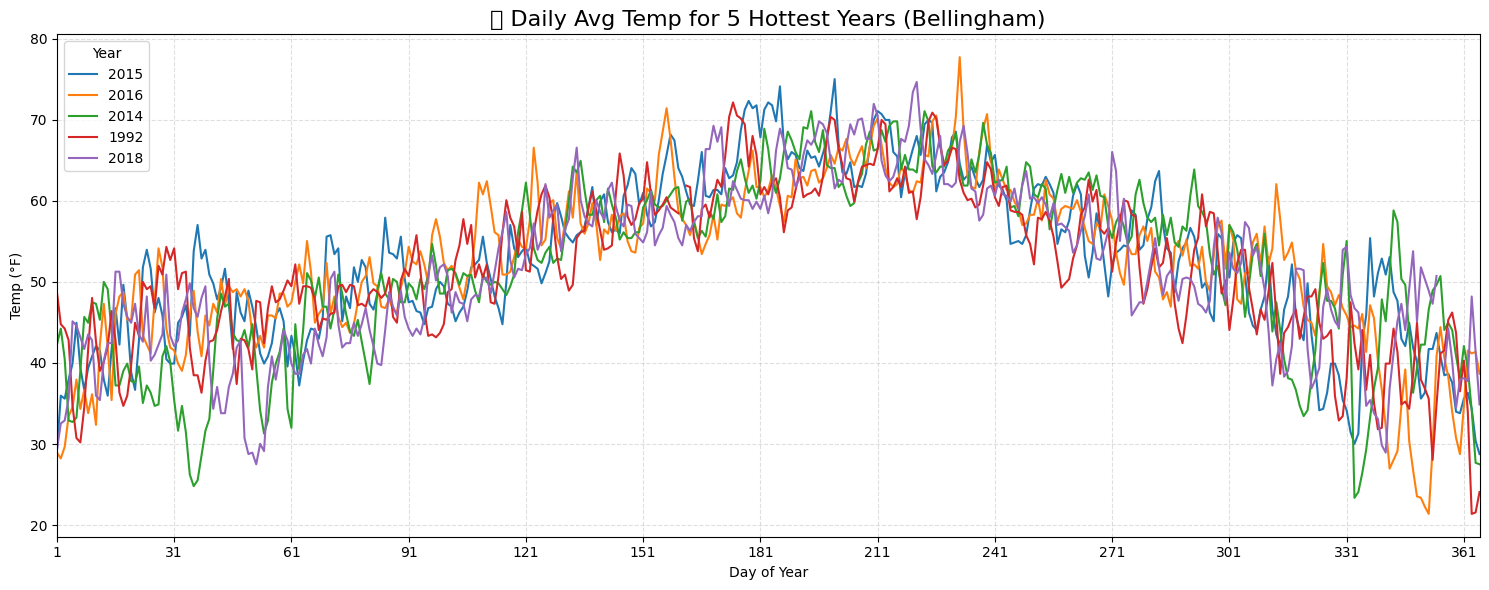

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and helper columns
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]  # Drop leap day
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32

# Find the 5 hottest years
yearly_avg = df.groupby('year')['temp_avg_f'].mean()
top5_years = yearly_avg.nlargest(5).index.tolist()

# Prepare figure
plt.figure(figsize=(15, 6))

# Plot each of the 5 hottest years
for year in top5_years:
    daily_avg = df[df['year'] == year].groupby('doy')['temp_avg_f'].mean()
    plt.plot(daily_avg.index, daily_avg.values, label=f"{year}")

# Plot formatting
plt.title("🔥 Daily Avg Temp for 5 Hottest Years (Bellingham)", fontsize=16)
plt.xlabel("Day of Year")
plt.ylabel("Temp (°F)")
plt.legend(title="Year", loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.xlim(1, 365)
plt.xticks(ticks=range(1, 366, 30))
plt.tight_layout()
plt.show()

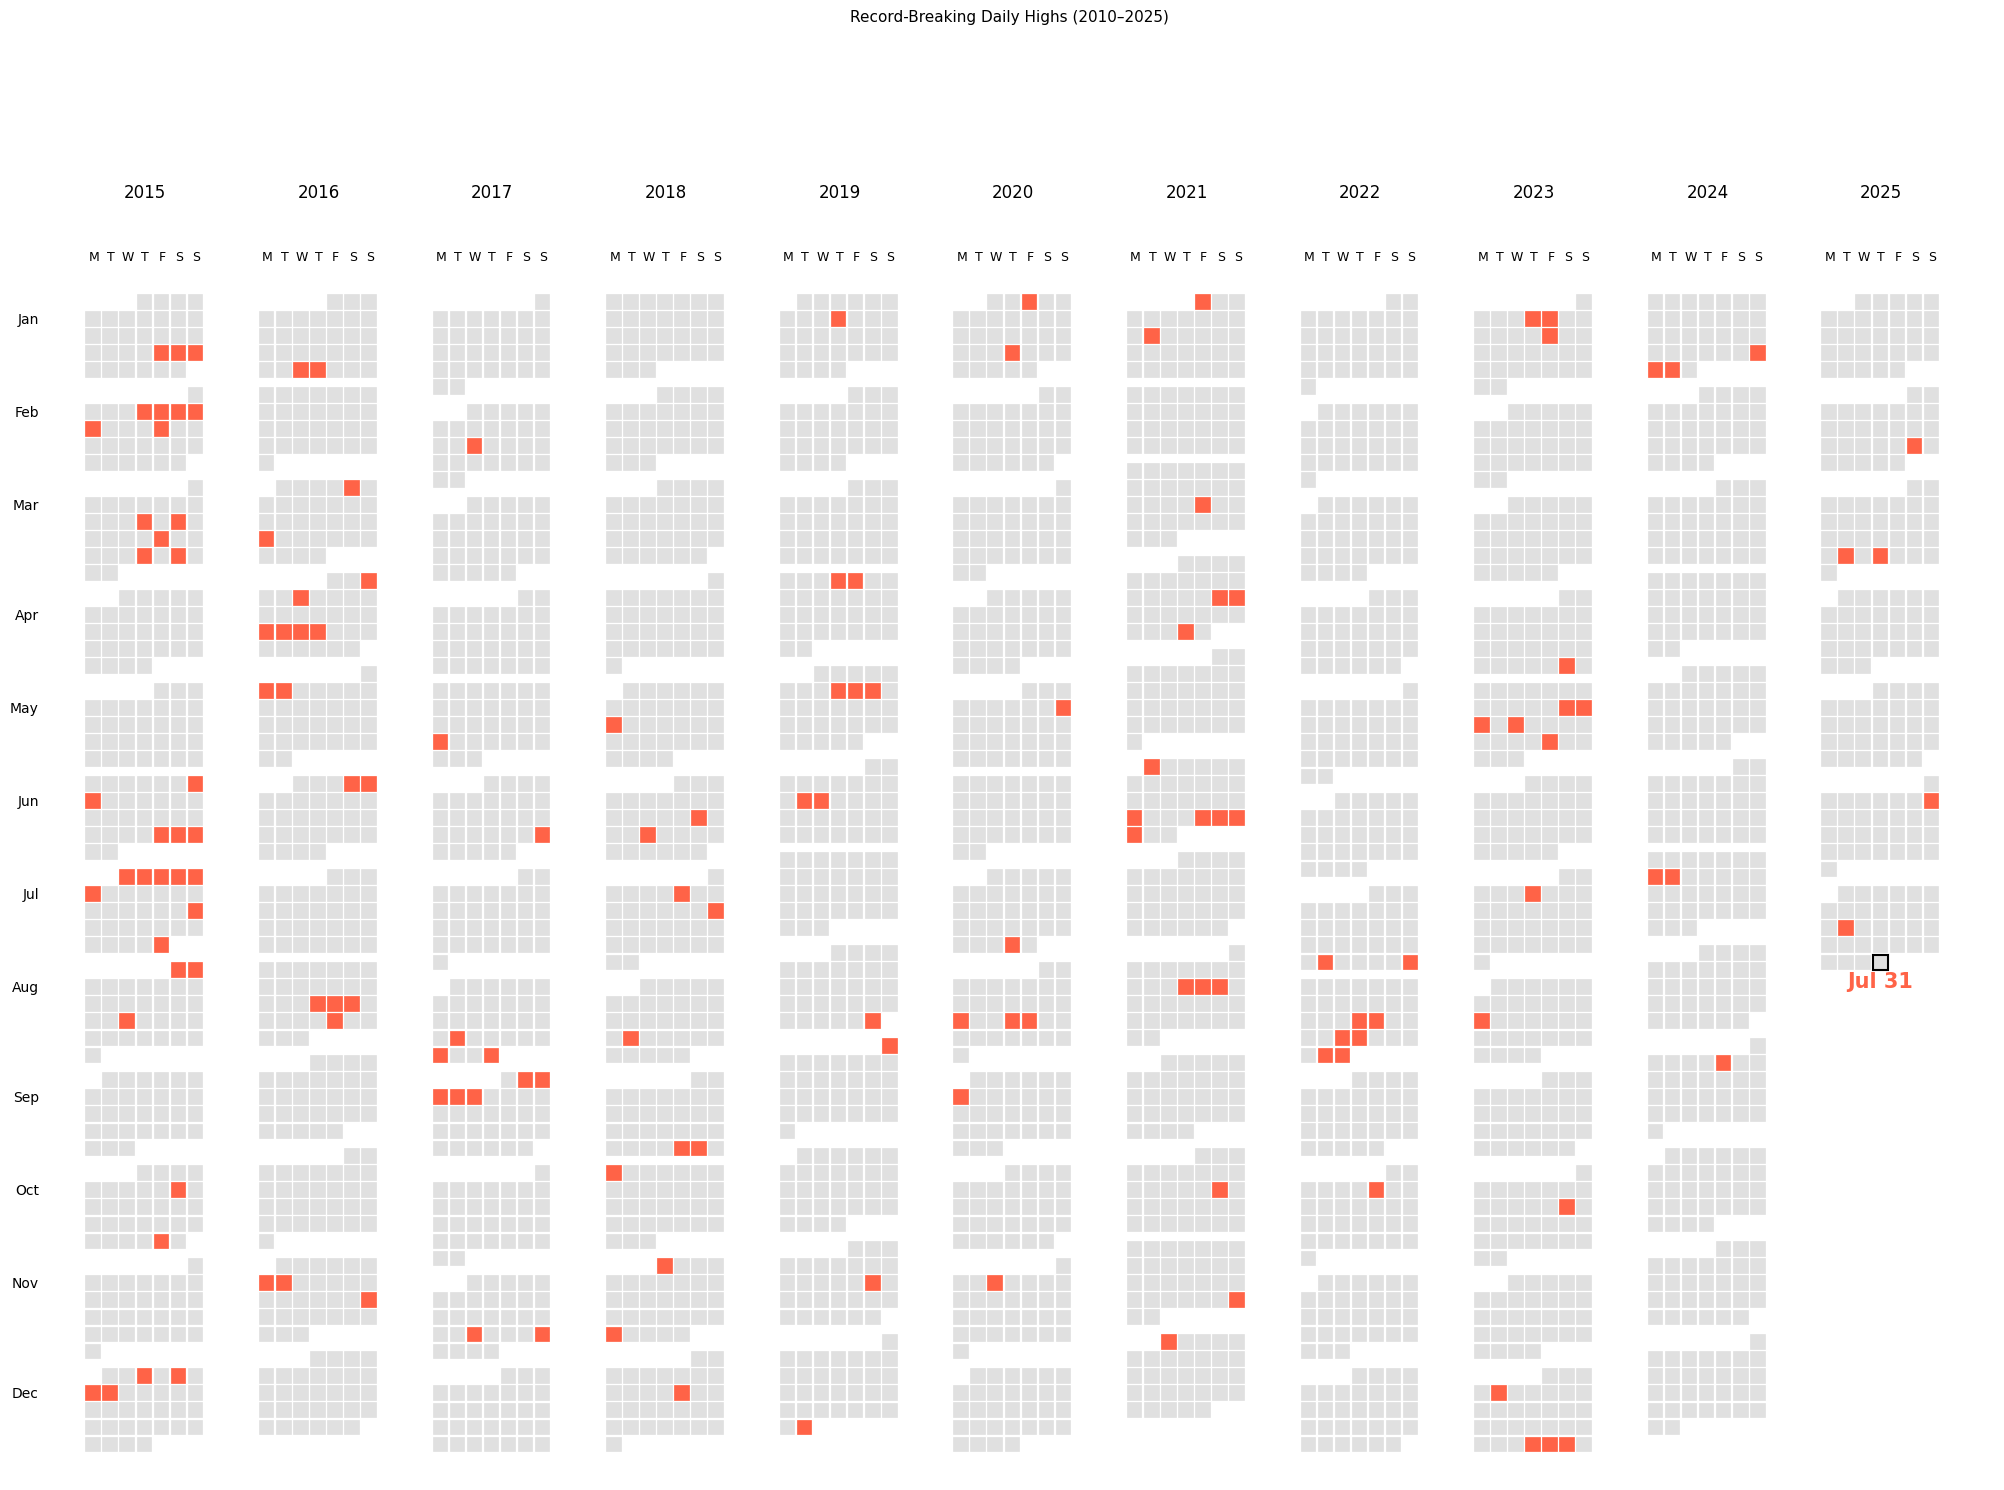

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import calendar
from datetime import datetime

# --- Prepare Data ---
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['weekday'] = df['time'].dt.weekday  # Monday = 0
df['week_of_month'] = df['time'].apply(lambda x: (x.day - 1) // 7)
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]
df = df.sort_values('time')

# --- Rolling Record Tracker ---
historical_max = pd.Series(-np.inf, index=range(1, 366))
records = []

for _, row in df.iterrows():
    doy = row['doy']
    temp = row['temp_avg_f']
    if pd.notna(temp) and temp > historical_max.get(doy, -np.inf):
        historical_max[doy] = temp
        records.append({
            'date': row['time'],
            'year': row['year'],
            'month': row['month'],
            'day': row['day'],
            'weekday': row['weekday'],
            'week_of_month': (row['day'] - 1) // 7
        })

record_df = pd.DataFrame(records)

# --- Use all years from 2010 to 2025 ---
all_years = list(range(2015, 2026))
record_df = record_df[record_df['year'].isin(all_years)]

# --- Layout Settings ---
cell_size = 0.2
cell_gap = 0.02
month_gap = 0.10
year_gap = 0.70

# --- Compute total height needed ---
max_y_offset = 0
for month in range(1, 13):
    first_weekday = pd.Timestamp(year=2015, month=month, day=1).weekday()
    num_days = calendar.monthrange(2015, month)[1]
    num_weeks = ((num_days + first_weekday - 1) // 7) + 1
    max_y_offset += num_weeks * (cell_size + cell_gap) + month_gap

# --- Create Figure ---
fig_width = max(13, len(all_years) * (7 * (cell_size + cell_gap) + year_gap))
fig, ax = plt.subplots(figsize=(fig_width, max_y_offset * 1.05))
ax.set_xlim(0, len(all_years) * (7 * (cell_size + cell_gap) + year_gap))
ax.set_ylim(max_y_offset + 1.2 * cell_size, 0)
ax.set_aspect('equal')
ax.set_yticks([])
ax.set_xticks([])

# --- Get today's date ---
today = datetime.today().date()

# --- Plot ---
for i, year in enumerate(all_years):
    year_df = record_df[record_df['year'] == year]
    x_offset = i * (7 * (cell_size + cell_gap) + year_gap)
    y_offset = 0

    for month in range(1, 13):
        num_days = calendar.monthrange(year, month)[1]
        first_day = pd.Timestamp(year=year, month=month, day=1)
        first_weekday = first_day.weekday()

        for day in range(1, num_days + 1):
            date = pd.Timestamp(year=year, month=month, day=day).date()
            if year == today.year and date > today:
                continue  # skip future boxes in current year

            weekday = date.weekday()
            week_row = ((day + first_weekday - 1) // 7)
            x = x_offset + weekday * (cell_size + cell_gap)
            y = y_offset + week_row * (cell_size + cell_gap)

            ax.add_patch(Rectangle(
                (x, y), cell_size, cell_size,
                facecolor='#e0e0e0', edgecolor='white', linewidth=0.2
            ))

            # Highlight today's box with gold border and label
            if date == today:
                ax.add_patch(Rectangle(
                    (x, y), cell_size, cell_size,
                    facecolor='none', edgecolor='black', linewidth=1.5
                ))
                ax.text(x + cell_size / 2, y + cell_size / 2 + 0.25, today.strftime('%b %d'),
                        ha='center', va='center', fontsize=15.0, fontweight='bold', color='#ff6347')

        # Fill record-breaking days
        for _, row in year_df[year_df['month'] == month].iterrows():
            date = pd.Timestamp(year=row['year'], month=row['month'], day=row['day']).date()
            if year == today.year and date > today:
                continue

            weekday = row['weekday']
            day = row['day']
            first_weekday = pd.Timestamp(year=year, month=month, day=1).weekday()
            week_row = ((day + first_weekday - 1) // 7)
            x = x_offset + weekday * (cell_size + cell_gap)
            y = y_offset + week_row * (cell_size + cell_gap)

            ax.add_patch(Rectangle(
                (x, y), cell_size, cell_size,
                facecolor='#ff6347', edgecolor='white', linewidth=0.2
            ))

        # Month label (once per row)
        if i == 0:
            mid_y = y_offset + 1.5 * (cell_size + cell_gap)
            ax.text(x_offset - 0.6, mid_y, calendar.month_abbr[month],
                    va='center', ha='right', fontsize=10)

        # Advance y for next month
        num_weeks = ((num_days + first_weekday - 1) // 7) + 1
        y_offset += num_weeks * (cell_size + cell_gap) + month_gap

    # Weekday headers
    xtick_pos = [x_offset + (j + 0.5) * (cell_size + cell_gap) for j in range(7)]
    for j, label in enumerate(['M', 'T', 'W', 'T', 'F', 'S', 'S']):
        ax.text(xtick_pos[j], -0.4, label, ha='center', va='bottom', fontsize=9)

    # Year label
    ax.text(x_offset + 3.5 * (cell_size + cell_gap), -1.2, str(year),
            ha='center', va='bottom', fontsize=12)

# --- Final Layout ---
plt.suptitle("Record-Breaking Daily Highs (2010–2025)", fontsize=11, y=1.05)
plt.axis('off')
plt.show()

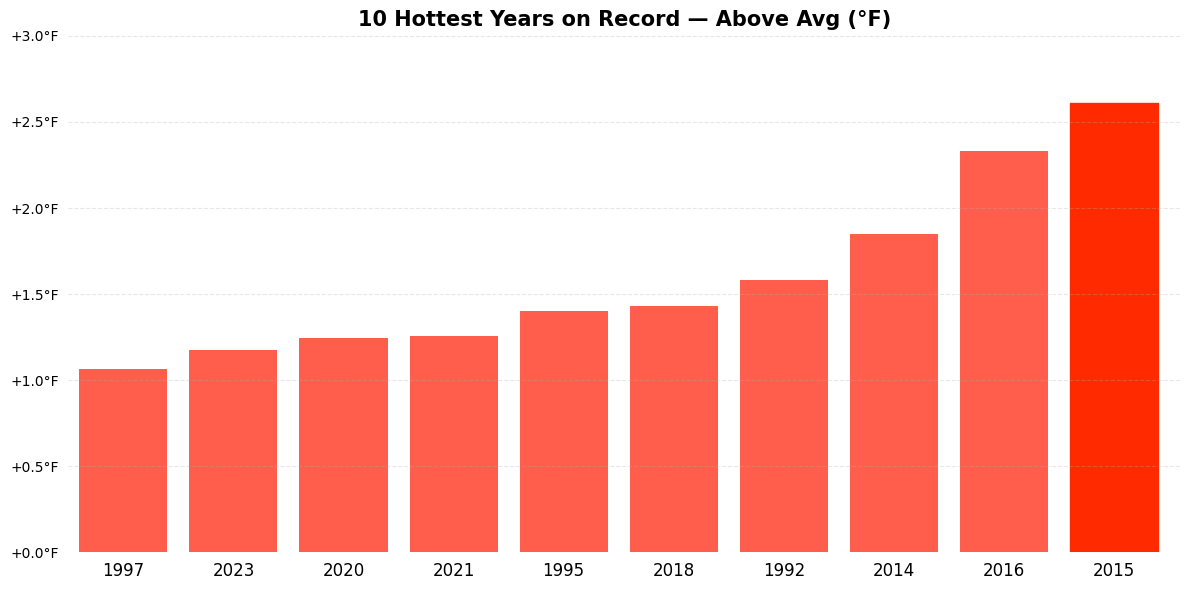

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- Prepare Data ---
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]  # Remove leap days
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32

# --- Calculate Yearly Averages ---
yearly_avg = df.groupby('year')['temp_avg_f'].mean()

# --- Calculate Baseline (e.g., full period average) ---
baseline_avg = yearly_avg.mean()

# --- Compute Anomalies ---
anomalies = yearly_avg - baseline_avg

# --- Get Top 10 Hottest Years by Anomaly ---
top10 = anomalies.sort_values(ascending=False).head(10).sort_values()

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = range(len(top10))  # 0, 1, 2, ..., 9
bars = ax.bar(x_pos, top10.values, color='#ff5e4d', width=0.8, align='edge')

# Highlight hottest bar
bars[-1].set_color('#ff2a00')

# --- Y-axis formatting with plus sign ---
def plus_formatter(x, pos):
    return f"+{x:.1f}°F" if x >= 0 else f"{x:.1f}°F"
ax.yaxis.set_major_formatter(FuncFormatter(plus_formatter))

# --- Style cleanup ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='x', bottom=False)
ax.tick_params(axis='y', left=False)
ax.set_xticks([x + 0.4 for x in x_pos])  # Center labels under each bar
ax.set_xticklabels(top10.index.astype(str), fontsize=12)

# --- Final touches ---
ax.set_title("10 Hottest Years on Record — Above Avg (°F)", fontsize=15, weight='bold')
ax.set_ylabel("")
ax.set_ylim(0, top10.max() + 0.4)
ax.set_xlim(-0.1, len(top10))  # Ensure first bar aligns to y-axis
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

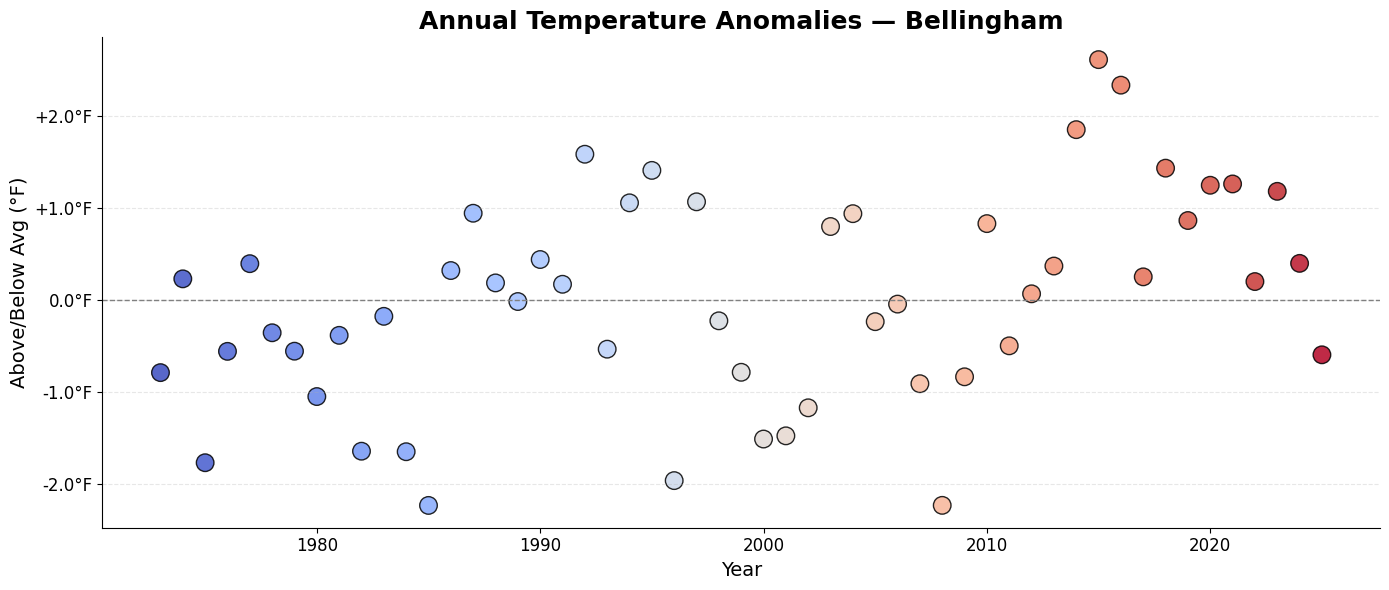

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# --- Prepare Data ---
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]  # Remove leap days
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32

# --- Yearly Averages and Anomalies ---
yearly_avg = df.groupby('year')['temp_avg_f'].mean()
baseline = yearly_avg.mean()
anomalies = yearly_avg - baseline
anomaly_df = anomalies.reset_index()
anomaly_df.columns = ['year', 'anomaly']

# --- Create color mapping ---
norm = mcolors.Normalize(vmin=anomaly_df['year'].min(), vmax=anomaly_df['year'].max())
cmap = cm.get_cmap('coolwarm')
colors = cmap(norm(anomaly_df['year']))

# --- Plot ---
fig, ax = plt.subplots(figsize=(14, 6))
scatter = ax.scatter(
    anomaly_df['year'], anomaly_df['anomaly'],
    c=colors, edgecolor='black', s=160, alpha=0.85  # Increased size to 160
)

# Horizontal line at baseline
ax.axhline(0, color='gray', linestyle='--', lw=1)

# Y-axis formatting with +/–
def plus_formatter(x, pos):
    return f"+{x:.1f}°F" if x > 0 else f"{x:.1f}°F"
ax.yaxis.set_major_formatter(FuncFormatter(plus_formatter))

# --- Style ---
ax.set_title("Annual Temperature Anomalies — Bellingham", fontsize=18, weight='bold')
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Above/Below Avg (°F)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Clean up look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

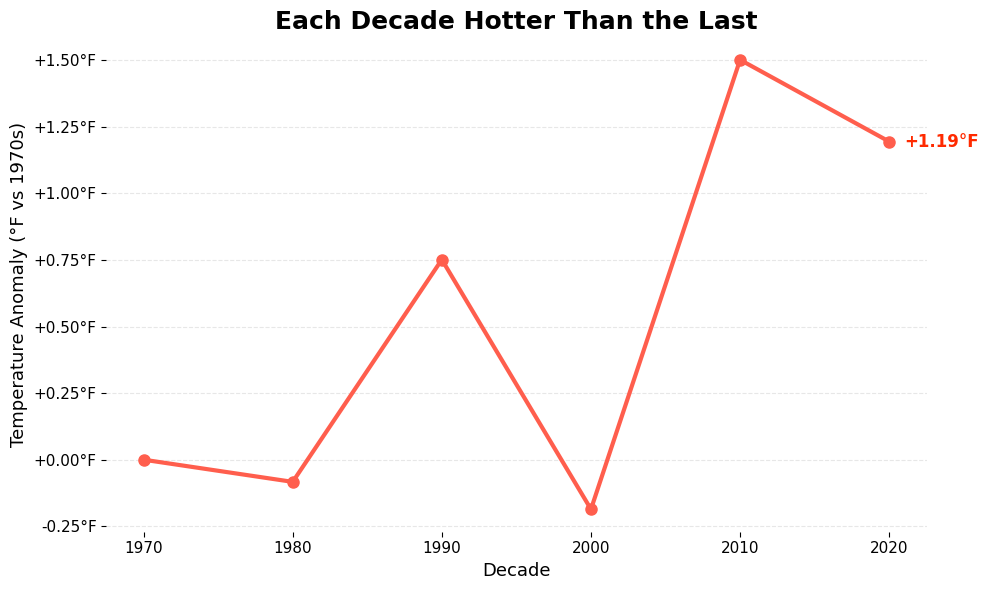

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- Prepare Data ---
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['doy'] = df['time'].dt.dayofyear
df = df[df['doy'] != 366]
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32
df['decade'] = (df['year'] // 10) * 10

# --- Select target decades ---
target_decades = [1970, 1980, 1990, 2000, 2010, 2020]
df = df[df['decade'].isin(target_decades)]

# --- Compute Decade Averages ---
decade_avg = df.groupby('decade')['temp_avg_f'].mean()

# --- Baseline = 1970s average ---
baseline = decade_avg.loc[1970]
anomalies = decade_avg - baseline

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))

# Line and point plot
ax.plot(anomalies.index, anomalies.values, color='#ff5e4d', lw=3, marker='o', markersize=8)

# Annotate final value
last_decade = anomalies.index[-1]
last_value = anomalies.iloc[-1]
ax.text(last_decade + 1, last_value, f"{last_value:+.2f}°F", fontsize=12, color='#ff2a00', weight='bold', va='center')

# Format Y axis with +/– sign
def plus_formatter(x, pos):
    return f"{x:+.2f}°F"
ax.yaxis.set_major_formatter(FuncFormatter(plus_formatter))

# Style
ax.set_title("Each Decade Hotter Than the Last", fontsize=18, weight='bold')
ax.set_xlabel("Decade", fontsize=13)
ax.set_ylabel("Temperature Anomaly (°F vs 1970s)", fontsize=13)
ax.tick_params(axis='both', labelsize=11)

# Light grid and clean look
ax.grid(axis='y', linestyle='--', alpha=0.3)
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

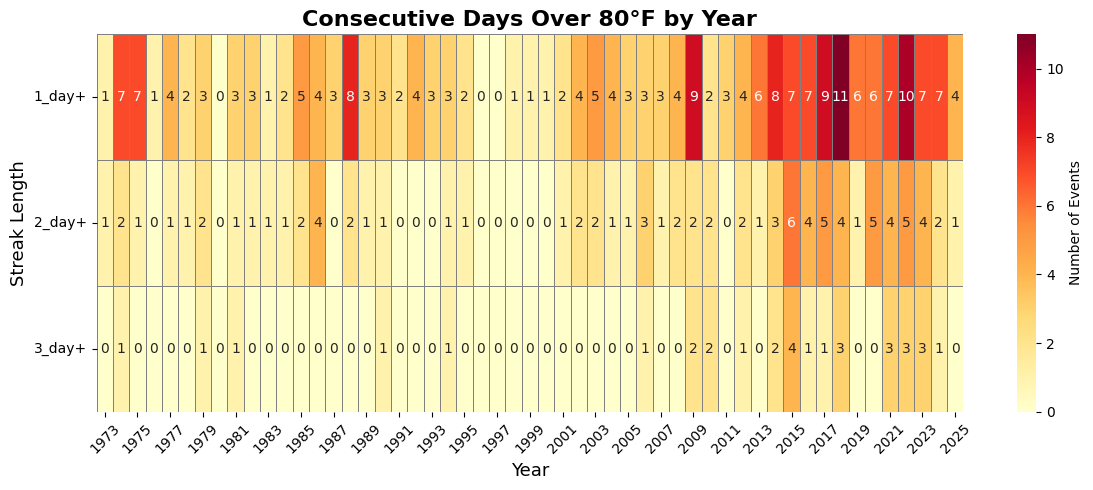

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prepare Data ---
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')
df['year'] = df['time'].dt.year
df['temp_max_f'] = df['temp_high_c'] * 9 / 5 + 32
df['over_80'] = df['temp_max_f'] > 80
df['over_80'] = df['over_80'].fillna(False)

# --- Initialize ---
streak_lengths = [1, 2, 3]
results = []

# --- Loop through each year ---
for year, group in df.groupby('year'):
    streaks = []
    count = 0

    for val in group['over_80']:
        if val:
            count += 1
        else:
            if count > 0:
                streaks.append(count)
            count = 0
    if count > 0:
        streaks.append(count)

    # Count how many streaks met each threshold
    streak_series = pd.Series(streaks)
    row = {'year': year}
    for length in streak_lengths:
        row[f"{length}_day+"] = (streak_series >= length).sum()
    results.append(row)

# --- Create DataFrame ---
heat_df = pd.DataFrame(results)
heat_df = heat_df.set_index('year')

# --- Plot ---
plt.figure(figsize=(12, 5))
sns.heatmap(
    heat_df.T, cmap="YlOrRd", annot=True, fmt='d',
    cbar_kws={'label': 'Number of Events'}, linewidths=0.5, linecolor='gray'
)

plt.title("Consecutive Days Over 80°F by Year", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=13)
plt.ylabel("Streak Length", fontsize=13)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

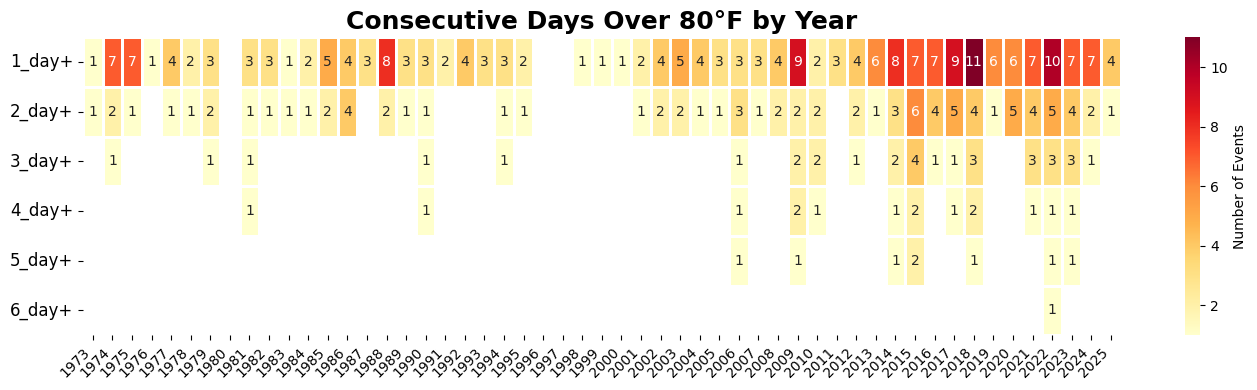

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Prepare Data ---
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')
df['year'] = df['time'].dt.year
df['temp_max_f'] = df['temp_high_c'] * 9 / 5 + 32
df['over_80'] = df['temp_max_f'] > 80
df['over_80'] = df['over_80'].fillna(False)

# --- Initialize ---
streak_lengths = [1, 2, 3, 4, 5, 6]
results = []

# --- Loop through each year ---
for year, group in df.groupby('year'):
    streaks = []
    count = 0

    for val in group['over_80']:
        if val:
            count += 1
        else:
            if count > 0:
                streaks.append(count)
            count = 0
    if count > 0:
        streaks.append(count)

    # Count how many streaks met each threshold
    streak_series = pd.Series(streaks)
    row = {'year': year}
    for length in streak_lengths:
        row[f"{length}_day+"] = (streak_series >= length).sum()
    results.append(row)

# --- Create DataFrame ---
heat_df = pd.DataFrame(results)
heat_df = heat_df.set_index('year')
heat_df = heat_df.T

# --- Mask 0s and set annotation values ---
mask = heat_df == 0
annot_vals = heat_df.where(~mask)

# --- Plot ---
plt.figure(figsize=(14, 4))
sns.heatmap(
    heat_df,
    cmap=sns.color_palette("YlOrRd", as_cmap=True),
    mask=mask,
    annot=annot_vals, fmt='.0f',
    linewidths=1, linecolor='white',
    cbar_kws={'label': 'Number of Events'},
    annot_kws={'fontsize': 10}
)

plt.title("Consecutive Days Over 80°F by Year", fontsize=18, weight='bold')
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

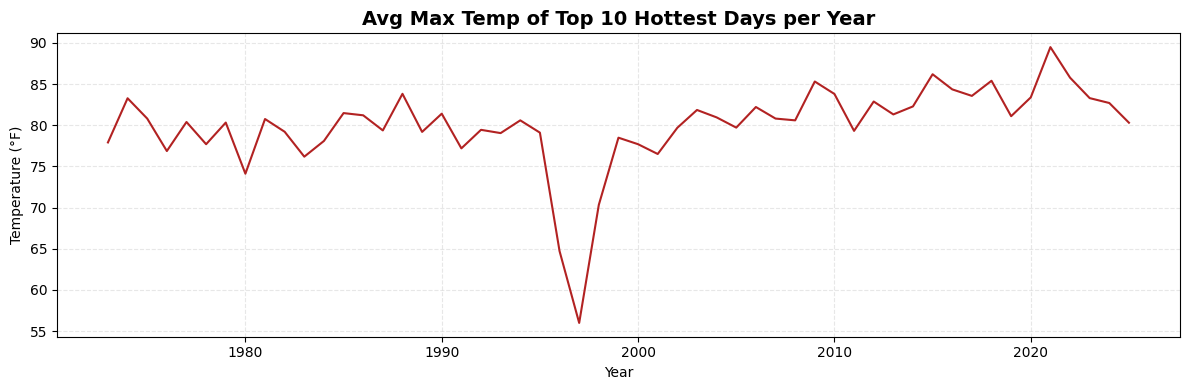

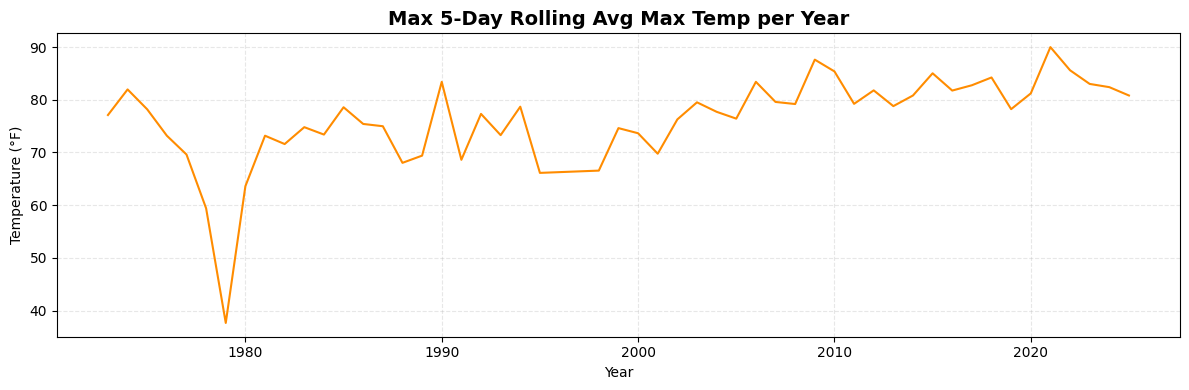

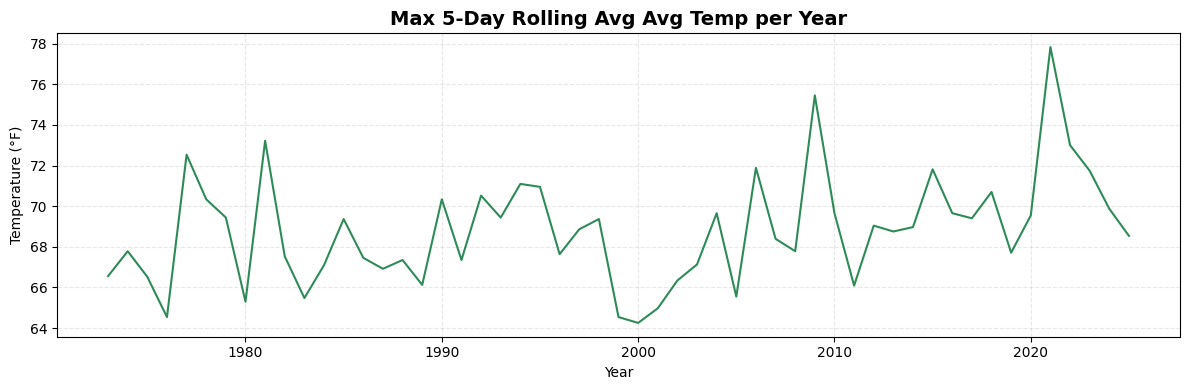

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prepare data ---
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')
df['year'] = df['time'].dt.year
df['temp_max_f'] = df['temp_high_c'] * 9 / 5 + 32
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32

# --- Hottest 10 Days per Year (Max Temp) ---
hottest_10 = df.groupby('year').apply(
    lambda x: x.nlargest(10, 'temp_max_f')['temp_max_f'].mean()
).rename("avg_top_10_max")

# --- Max 5-Day Rolling Avg (Max Temp) ---
hottest_5_span_max = df.groupby('year').apply(
    lambda g: g['temp_max_f'].rolling(window=5).mean().max()
).rename("max_5_day_avg_max")

# --- Max 5-Day Rolling Avg (Avg Temp) ---
hottest_5_span_avg = df.groupby('year').apply(
    lambda g: g['temp_avg_f'].rolling(window=5).mean().max()
).rename("max_5_day_avg_avg")

# --- Plot 1: Avg of Top 10 Max Temp Days ---
plt.figure(figsize=(12, 4))
sns.lineplot(x=hottest_10.index, y=hottest_10.values, color='firebrick')
plt.title("Avg Max Temp of Top 10 Hottest Days per Year", fontsize=14, weight='bold')
plt.ylabel("Temperature (°F)")
plt.xlabel("Year")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Plot 2: Max 5-Day Rolling Avg Max Temp ---
plt.figure(figsize=(12, 4))
sns.lineplot(x=hottest_5_span_max.index, y=hottest_5_span_max.values, color='darkorange')
plt.title("Max 5-Day Rolling Avg Max Temp per Year", fontsize=14, weight='bold')
plt.ylabel("Temperature (°F)")
plt.xlabel("Year")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Plot 3: Max 5-Day Rolling Avg Avg Temp ---
plt.figure(figsize=(12, 4))
sns.lineplot(x=hottest_5_span_avg.index, y=hottest_5_span_avg.values, color='seagreen')
plt.title("Max 5-Day Rolling Avg Avg Temp per Year", fontsize=14, weight='bold')
plt.ylabel("Temperature (°F)")
plt.xlabel("Year")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

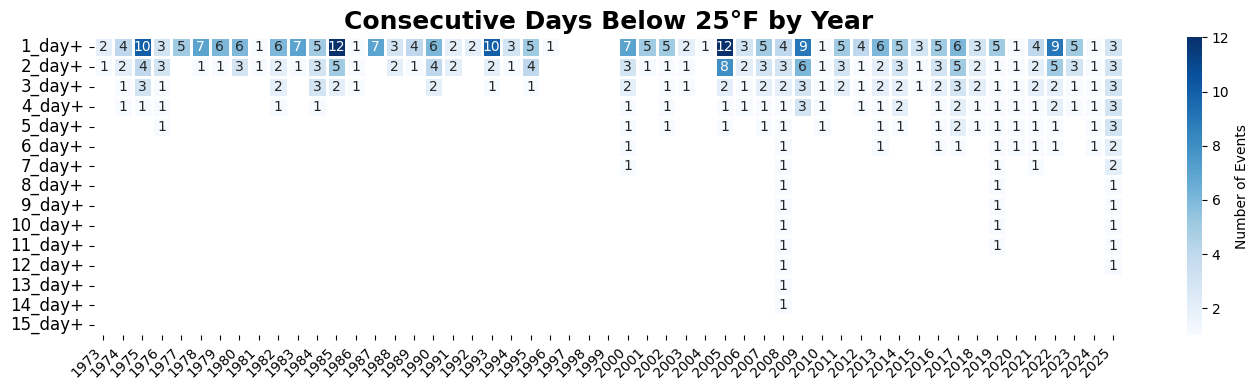

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prepare Data ---
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')
df['year'] = df['time'].dt.year
df['temp_min_f'] = df['temp_low_c'] * 9 / 5 + 32
df['below_30'] = df['temp_min_f'] < 25
df['below_30'] = df['below_30'].fillna(False)

# --- Initialize ---
streak_lengths = [1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15]
results = []

# --- Loop through each year ---
for year, group in df.groupby('year'):
    streaks = []
    count = 0

    for val in group['below_30']:
        if val:
            count += 1
        else:
            if count > 0:
                streaks.append(count)
            count = 0
    if count > 0:
        streaks.append(count)

    # Count how many streaks met each threshold
    streak_series = pd.Series(streaks)
    row = {'year': year}
    for length in streak_lengths:
        row[f"{length}_day+"] = (streak_series >= length).sum()
    results.append(row)

# --- Create DataFrame ---
heat_df = pd.DataFrame(results)
heat_df = heat_df.set_index('year')
heat_df = heat_df.T

# --- Mask 0s ---
mask = heat_df == 0

# --- Plot ---
plt.figure(figsize=(14, 4))
sns.heatmap(
    heat_df,
    cmap=sns.color_palette("Blues", as_cmap=True),
    mask=mask,
    annot=heat_df, fmt='d',
    linewidths=1, linecolor='white',
    cbar_kws={'label': 'Number of Events'},
    annot_kws={'fontsize': 10}
)

plt.title("Consecutive Days Below 25°F by Year", fontsize=18, weight='bold')
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

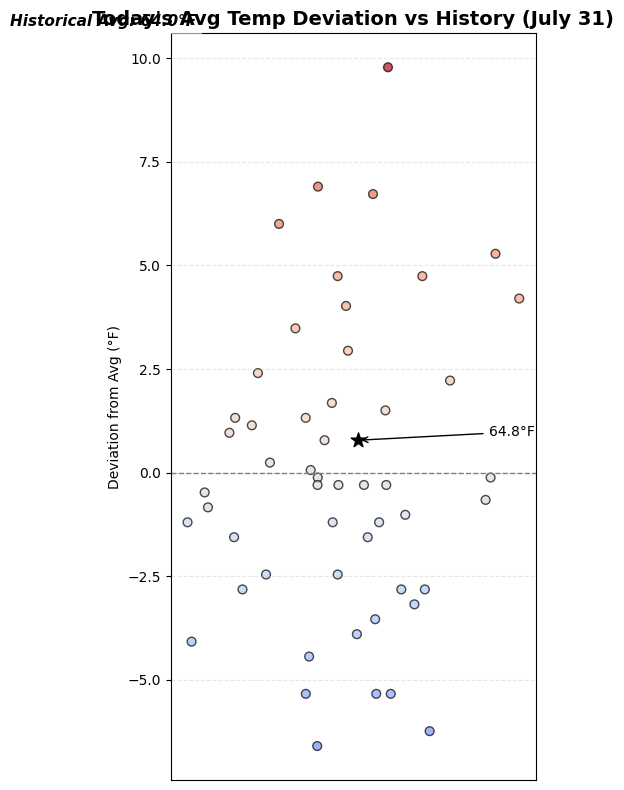

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

# --- Prepare Data ---
df['time'] = pd.to_datetime(df['time'])
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32
df['doy'] = df['time'].dt.dayofyear
df['year'] = df['time'].dt.year

# --- Today's Date ---
today = dt.datetime.now().date()
today_doy = today.timetuple().tm_yday

# --- Historical Data for This Day-of-Year ---
historical = df[df['doy'] == today_doy].copy()
historical = historical[~historical['temp_avg_f'].isna()]

# --- Long-term average for today ---
long_term_avg = historical['temp_avg_f'].mean()
historical['deviation'] = historical['temp_avg_f'] - long_term_avg

# --- Add jitter to x-values ---
np.random.seed(42)
historical['x_jitter'] = np.random.normal(loc=0, scale=0.1, size=len(historical))

# --- Today's Temperature ---
today_row = df[df['time'].dt.date == today]
today_temp = today_row['temp_avg_f'].values[0] if not today_row.empty else None
today_dev = today_temp - long_term_avg if today_temp is not None else None

# --- Plot ---
fig, ax = plt.subplots(figsize=(6, 8))

# --- Scatter plot ---
sc = ax.scatter(
    historical['x_jitter'],
    historical['deviation'],
    c=historical['deviation'],
    cmap="coolwarm",
    edgecolor='black',
    s=40,
    alpha=0.7,
    vmin=-10, vmax=10  # Symmetrical around 0
)

# --- Highlight today ---
if today_dev is not None:
    ax.scatter(
        0, today_dev,
        color='black',
        s=120,
        marker='*',
        label=f"Today: {today_temp:.1f}°F ({today_dev:+.1f}°F)"
    )
    ax.annotate(
        f"{today_temp:.1f}°F",
        xy=(0, today_dev),
        xytext=(0.15, today_dev + 0.1),
        arrowprops=dict(arrowstyle='->', lw=1),
        fontsize=10,
        ha='left'
    )

# --- Horizontal line at 0 ---
ax.axhline(0, color='gray', linestyle='--', lw=1)

# --- Label: Historical Avg ---
ax.text(
    -0.4, max(historical['deviation']) + 1,
    f"Historical Avg: {long_term_avg:.1f}°F",
    fontsize=11,
    fontstyle='italic',
    weight='bold',
    bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
)

# --- Formatting ---
ax.set_title(f"Today's Avg Temp Deviation vs History ({today.strftime('%B %d')})", fontsize=14, weight='bold')
ax.set_ylabel("Deviation from Avg (°F)")
ax.set_xticks([])
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

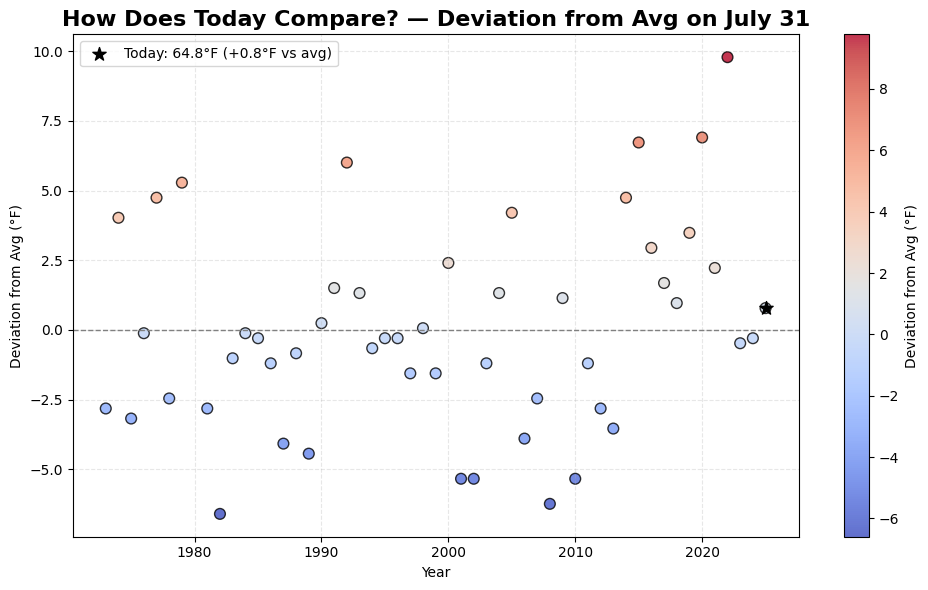

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

# --- Prepare Data ---
df['time'] = pd.to_datetime(df['time'])
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32
df['doy'] = df['time'].dt.dayofyear
df['year'] = df['time'].dt.year

# --- Today's Date ---
today = dt.datetime.now().date()
today_doy = today.timetuple().tm_yday

# --- Historical Data for This Day-of-Year ---
historical = df[df['doy'] == today_doy].copy()
historical = historical[~historical['temp_avg_f'].isna()]  # Drop NaNs

# --- Long-term average for today ---
long_term_avg = historical['temp_avg_f'].mean()
historical['deviation'] = historical['temp_avg_f'] - long_term_avg

# --- Today's Temperature & Deviation ---
today_row = df[df['time'].dt.date == today]
today_temp = today_row['temp_avg_f'].values[0] if not today_row.empty else None
today_dev = today_temp - long_term_avg if today_temp is not None else None

# --- Normalize color by deviation ---
norm = plt.Normalize(historical['deviation'].min(), historical['deviation'].max())
cmap = plt.get_cmap("coolwarm")

# --- Plot ---
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=historical['year'],
    y=historical['deviation'],
    c=historical['deviation'],
    cmap=cmap,
    norm=norm,
    edgecolor='black',
    s=60,
    alpha=0.8
)

# --- Highlight Today's Value ---
if today_temp is not None:
    plt.scatter(
        x=today.year,
        y=today_dev,
        color='black',
        s=100,
        label=f"Today: {today_temp:.1f}°F ({today_dev:+.1f}°F vs avg)",
        marker='*',
        zorder=5
    )

# --- Customize Plot ---
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(f"How Does Today Compare? — Deviation from Avg on {today.strftime('%B %d')}", fontsize=16, weight='bold')
plt.xlabel("Year")
plt.ylabel("Deviation from Avg (°F)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.colorbar(scatter, label="Deviation from Avg (°F)")
if today_temp is not None:
    plt.legend()
plt.tight_layout()
plt.show()

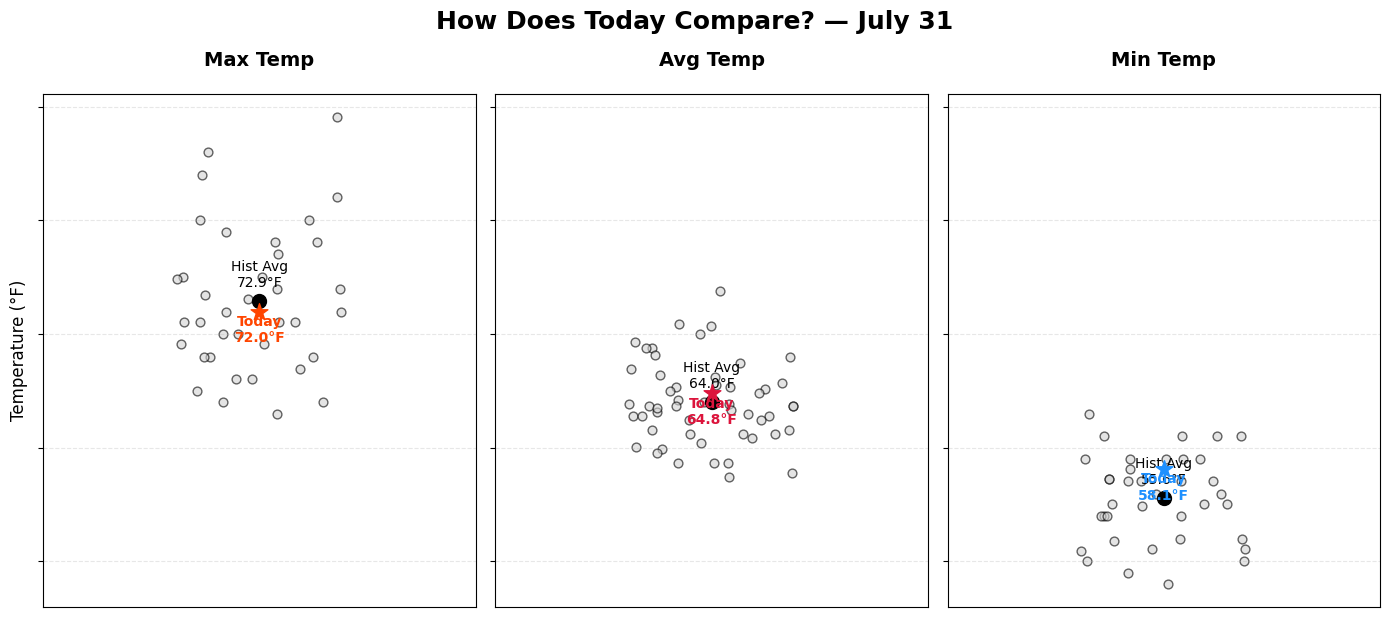

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

# --- Prepare Data ---
df['time'] = pd.to_datetime(df['time'])
df['doy'] = df['time'].dt.dayofyear
df['year'] = df['time'].dt.year
df['temp_max_f'] = df['temp_high_c'] * 9 / 5 + 32
df['temp_min_f'] = df['temp_low_c'] * 9 / 5 + 32
df['temp_avg_f'] = df['temp_avg_c'] * 9 / 5 + 32

# --- Today's Date ---
today = dt.datetime.now().date()
today_doy = today.timetuple().tm_yday

# --- Setup Plot ---
fig, axes = plt.subplots(1, 3, figsize=(14, 6), sharey=True)
temp_types = [
    ('temp_max_f', 'Max Temp', 'orangered'),
    ('temp_avg_f', 'Avg Temp', 'crimson'),
    ('temp_min_f', 'Min Temp', 'dodgerblue')
]

# --- Loop Through Each Temp Type ---
for i, (ax, (col, label, color)) in enumerate(zip(axes, temp_types)):
    data = df[df['doy'] == today_doy].copy()
    data = data[~data[col].isna()]
    hist_mean = data[col].mean()
    today_val = df[df['time'].dt.date == today][col].values[0] if not df[df['time'].dt.date == today].empty else None

    # Jittered X
    np.random.seed(42)
    x_jitter = 0.5 + np.random.uniform(-0.04, 0.04, size=len(data))

    # Plot historical data
    ax.scatter(x_jitter, data[col], color='lightgray', edgecolor='black', s=40, alpha=0.6, zorder=1)

    # Historical average
    ax.scatter(0.5, hist_mean, color='black', s=100, zorder=2)
    ax.annotate(f"Hist Avg\n{hist_mean:.1f}°F", (0.5, hist_mean),
                textcoords="offset points", xytext=(0, 10),
                ha='center', fontsize=10, color='black', zorder=3)

    # Today's temp
    if today_val is not None:
        ax.scatter(0.5, today_val, color=color, s=160, marker='*', zorder=4)
        ax.annotate(f"Today\n{today_val:.1f}°F", (0.5, today_val),
                    textcoords="offset points", xytext=(0, -22),
                    ha='center', fontsize=10, color=color, weight='bold', zorder=5)

    # Style
    ax.set_xlim(0.4, 0.6)
    ax.set_xticks([])
    ax.set_title(label, fontsize=14, weight='bold', pad=20)
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)
    if i == 0:
        ax.set_ylabel("Temperature (°F)", fontsize=12)
    else:
        ax.set_yticklabels([])

# --- Overall Title and Layout ---
plt.suptitle(f"How Does Today Compare? — {today.strftime('%B %d')}", fontsize=18, weight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [ ]:
yy